<a href="https://colab.research.google.com/github/pybuttheavy/Prog2kakushin/blob/main/Work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-01-18 21:48:11--  https://1.bp.blogspot.com/-8P5zIo20u0M/WIW-PEzskrI/AAAAAAABBTA/z1LuZ7VuZp4jB8cVOTnaIDg7LEPS1NYeACLcB/s600/ma-jan1_manzu.png
Resolving 1.bp.blogspot.com (1.bp.blogspot.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to 1.bp.blogspot.com (1.bp.blogspot.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65546 (64K) [image/png]
Saving to: ‘ma-jan1_manzu.png’

ma-jan1_manzu.png   100%[===================>]  64.01K  --.-KB/s    in 0.001s  

2024-01-18 21:48:11 (105 MB/s) - ‘ma-jan1_manzu.png’ saved [65546/65546]

--2024-01-18 21:48:12--  https://1.bp.blogspot.com/-FkHa1pqdVL8/XV-ladNgcOI/AAAAAAABUO8/yhB4DrKbPoEA_c4SE0e3L_AGIqvRIDXvACLcBGAs/s600/ma-jan2_pinzu.png
Resolving 1.bp.blogspot.com (1.bp.blogspot.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to 1.bp.blogspot.com (1.bp.blogspot.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76622 (75K) [image/png

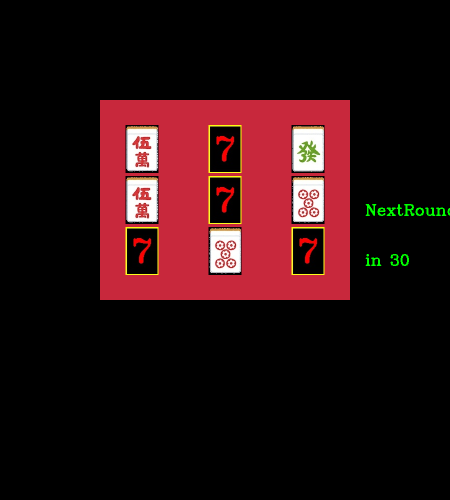

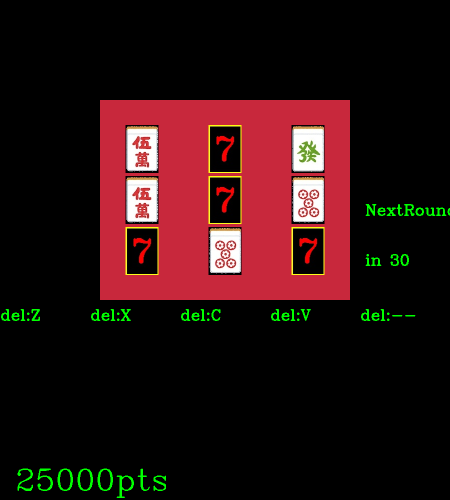

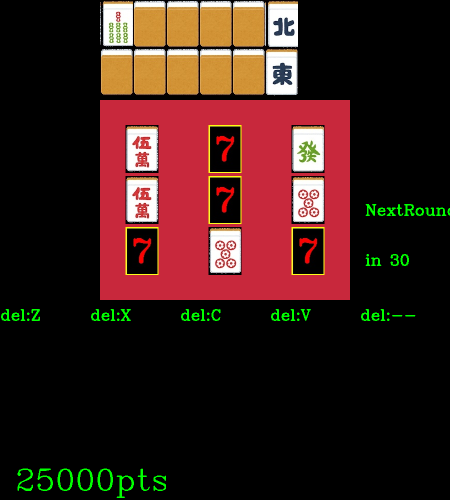

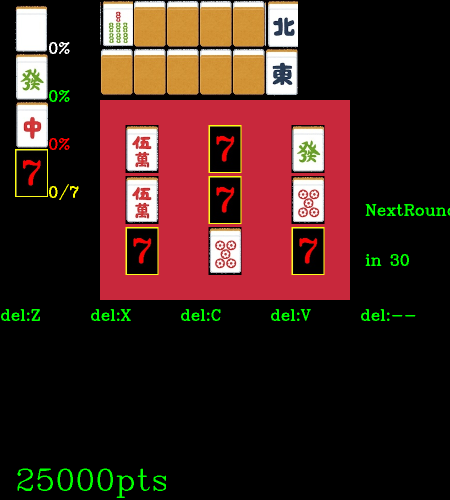

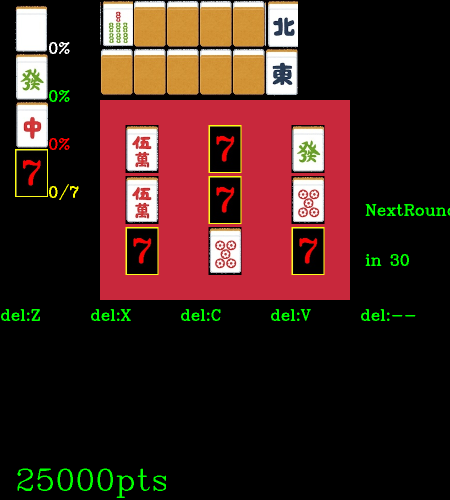

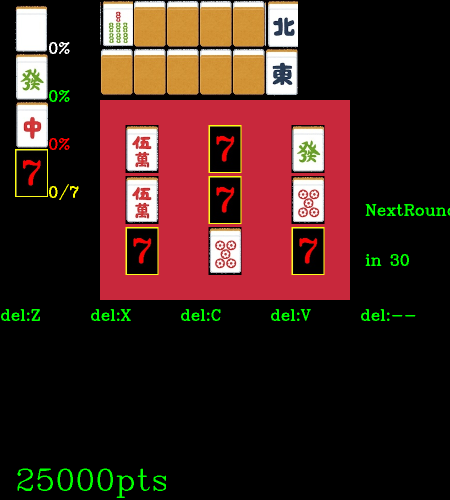

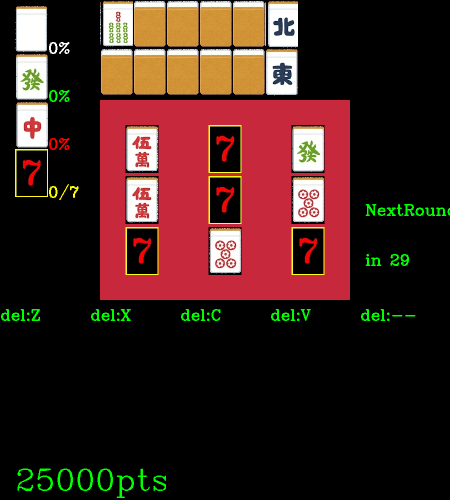

spin:


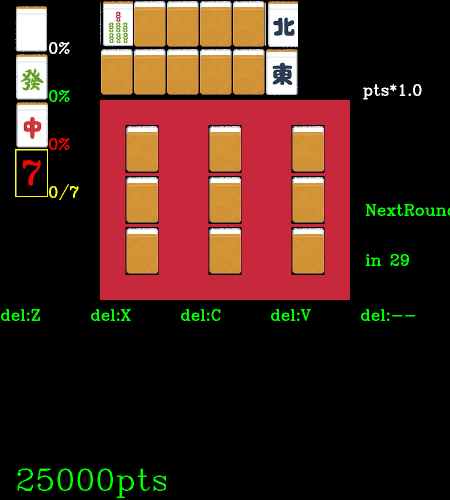

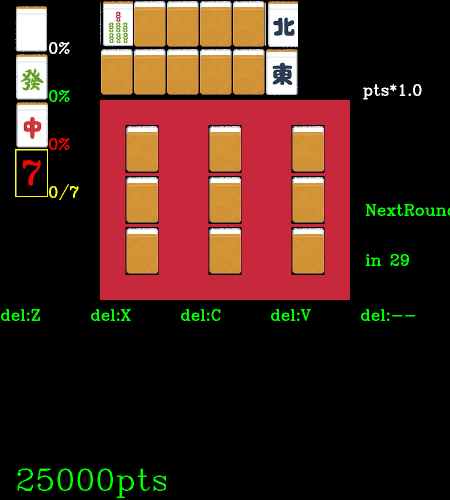

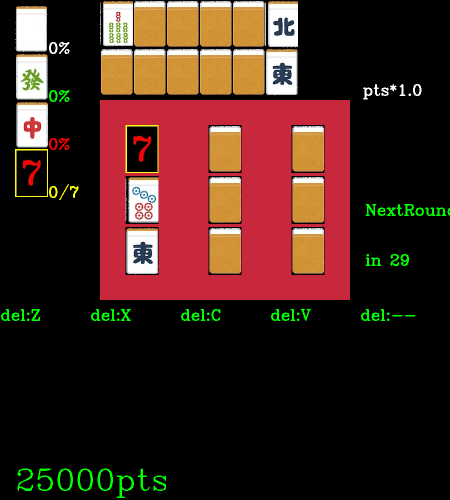

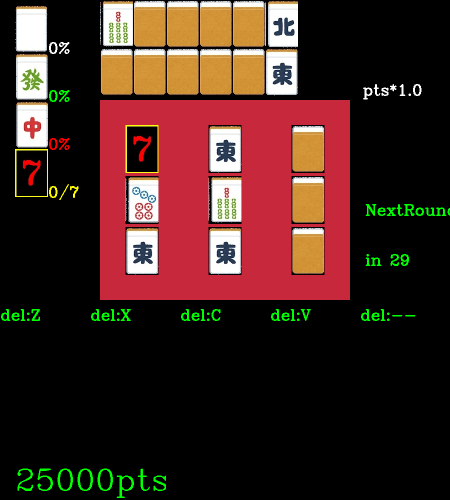

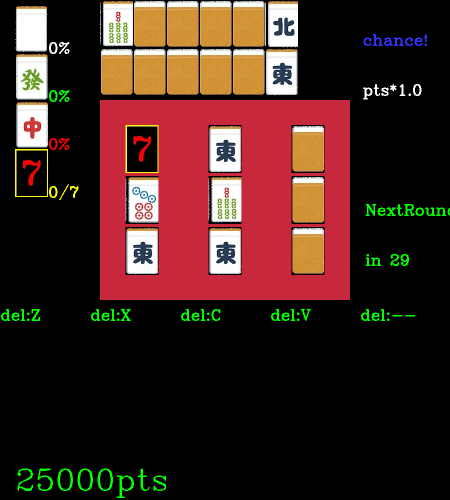

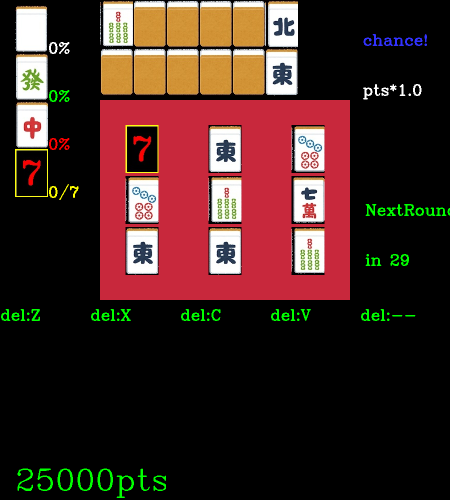

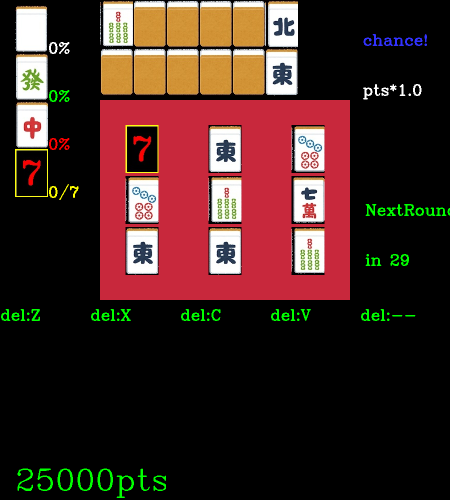

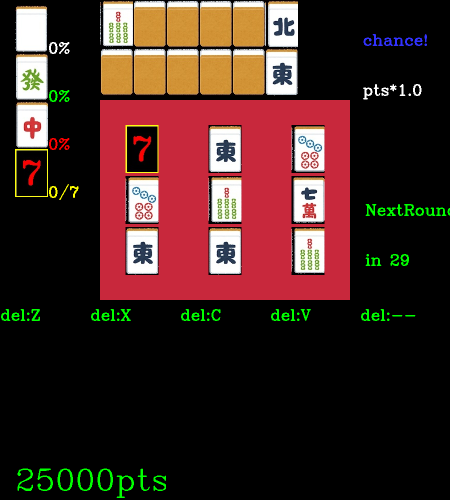

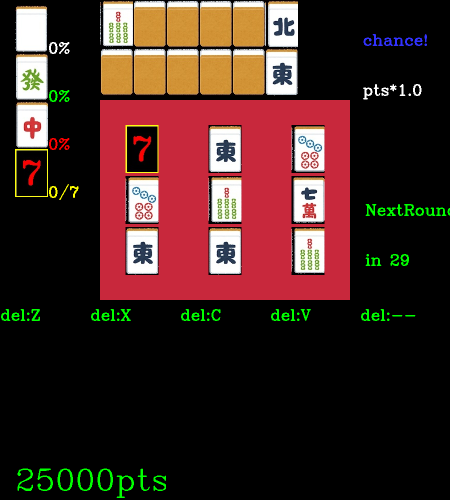

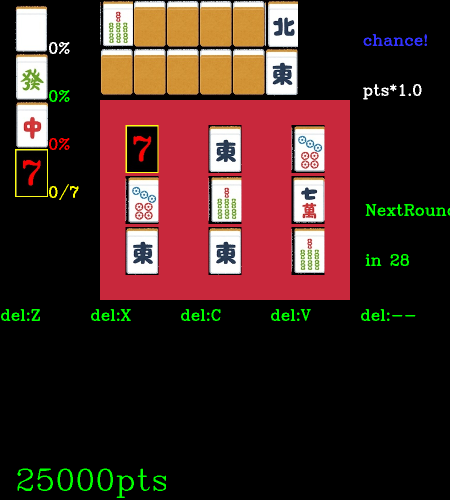

spin:


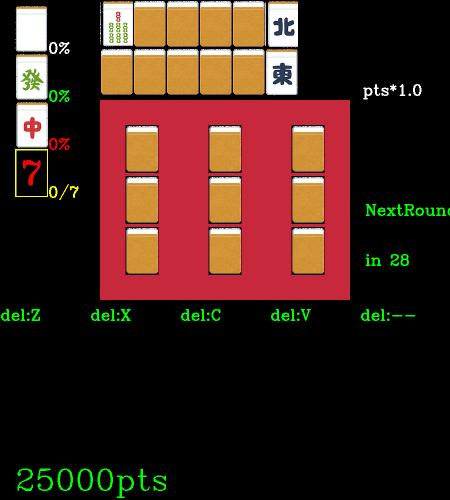

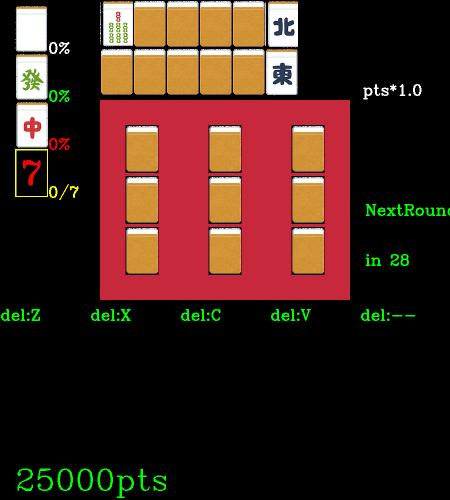

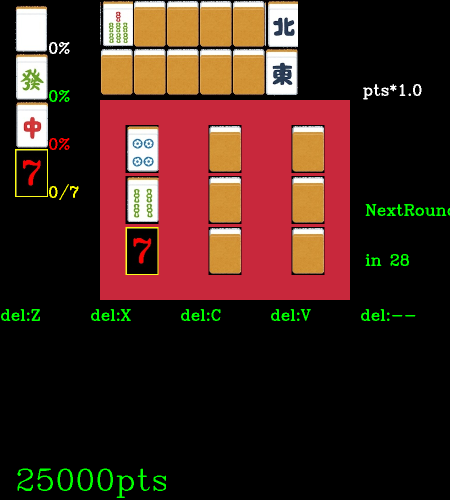

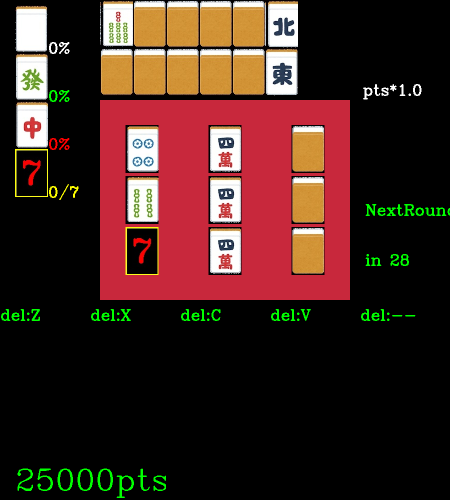

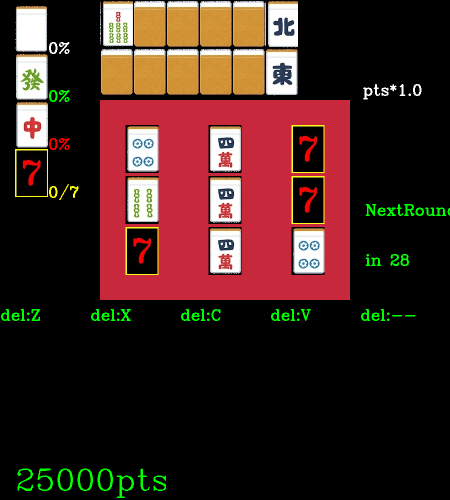

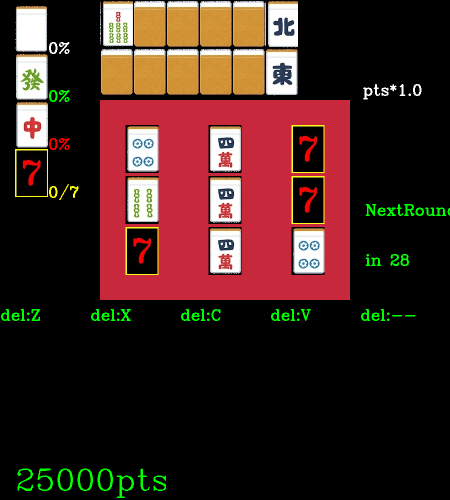

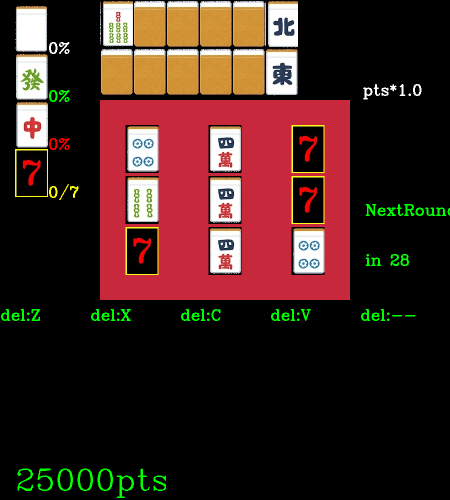

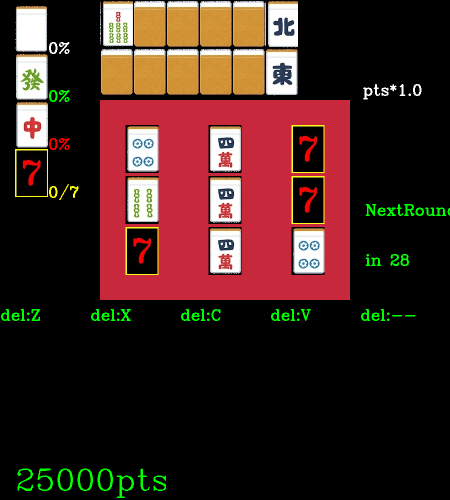

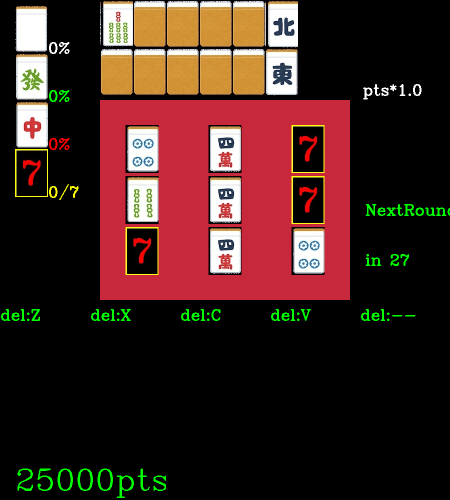

spin:


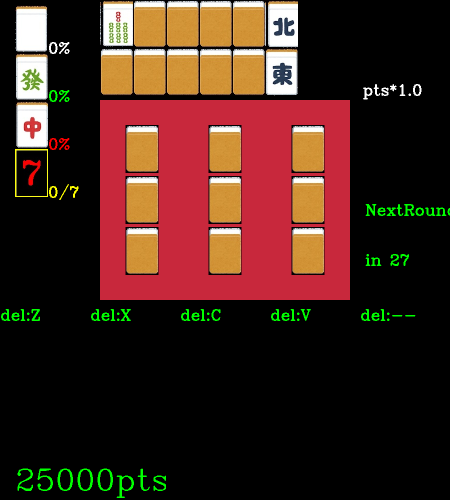

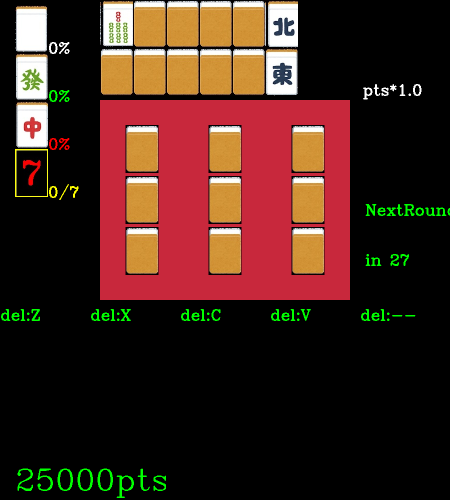

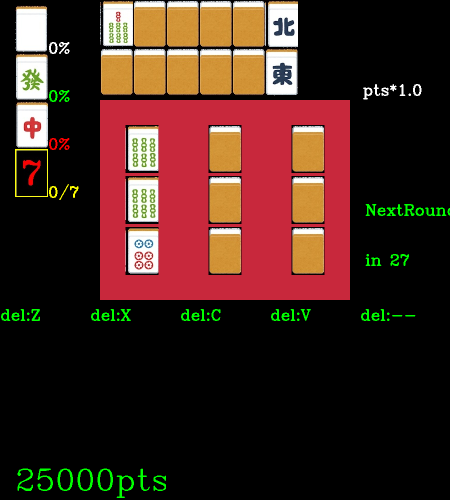

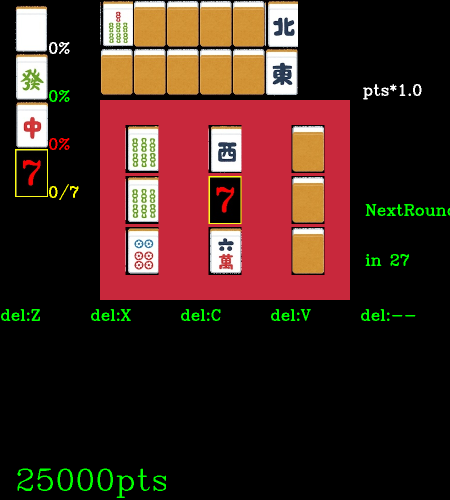

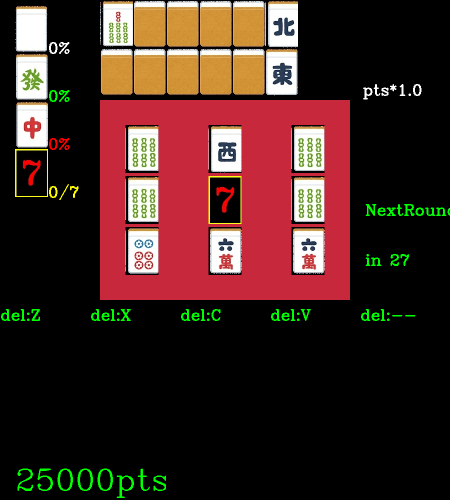

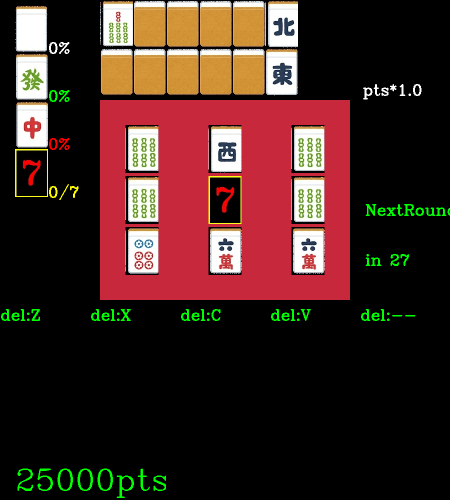

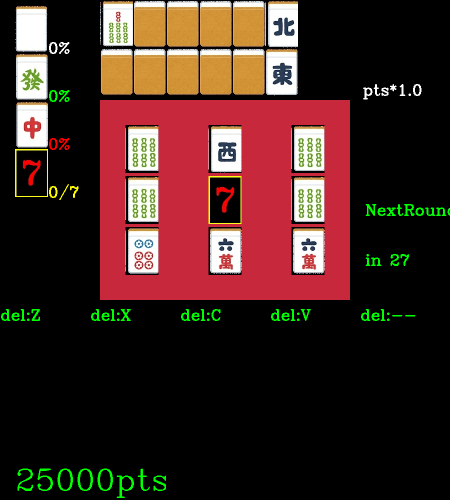

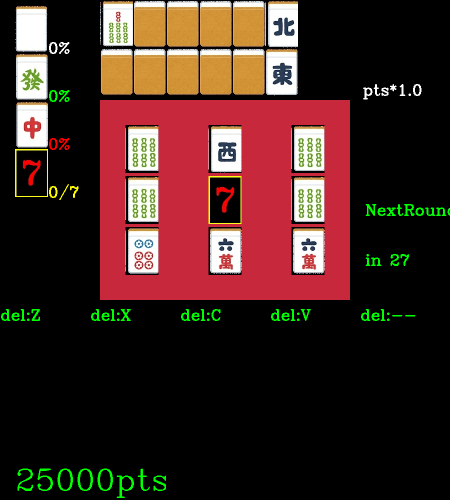

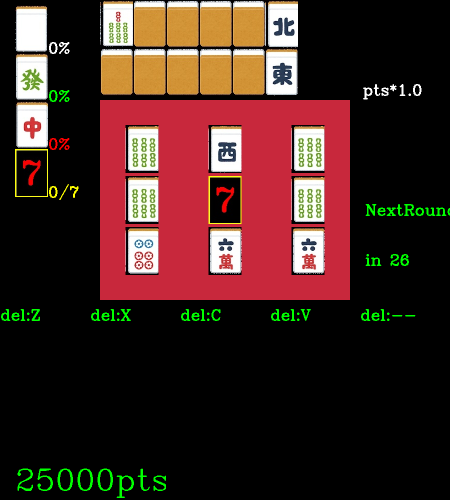

spin:


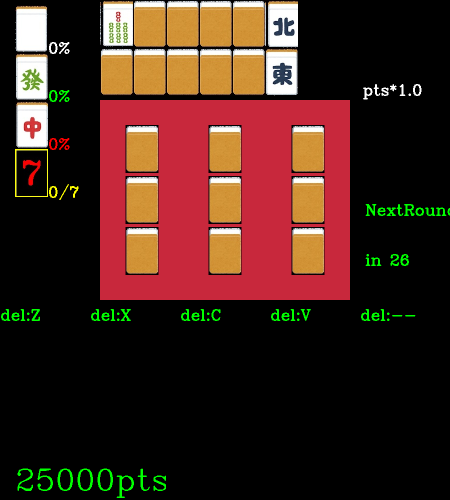

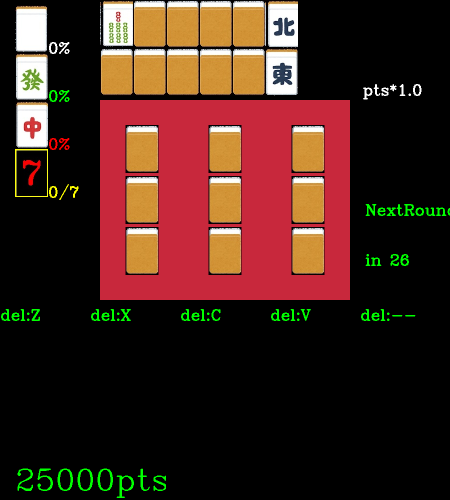

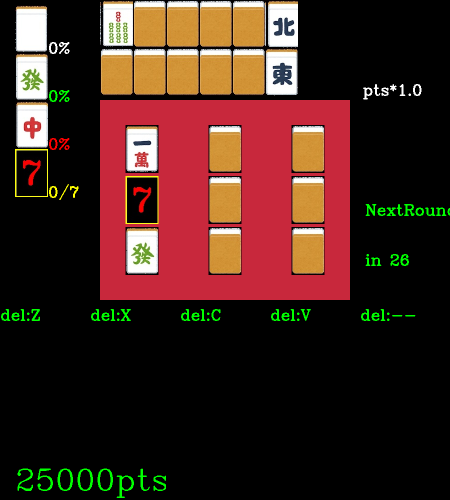

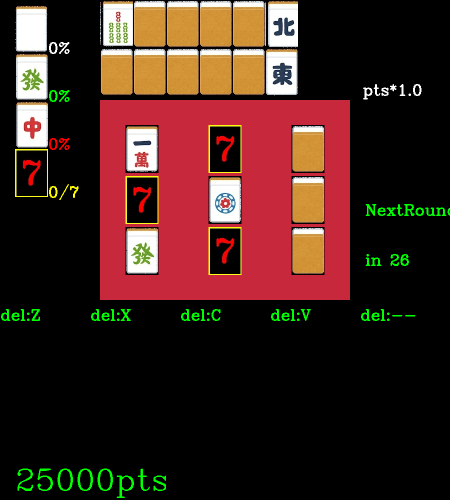

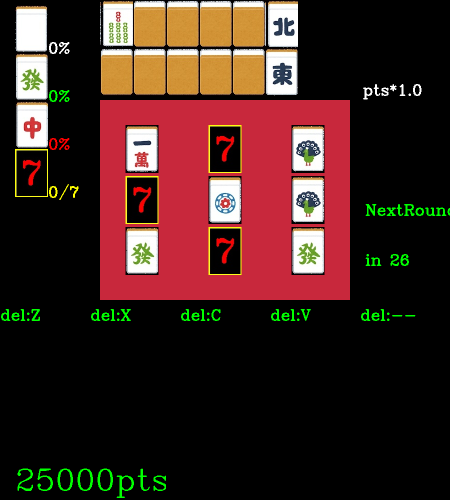

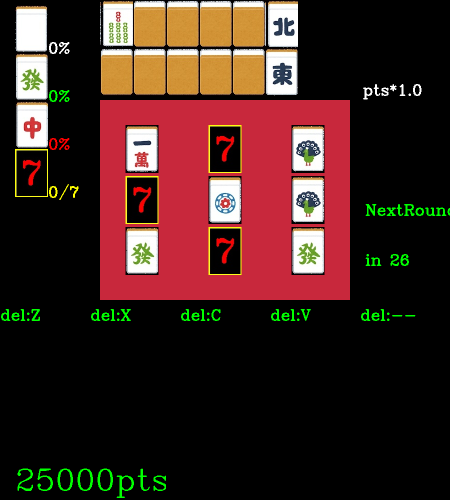

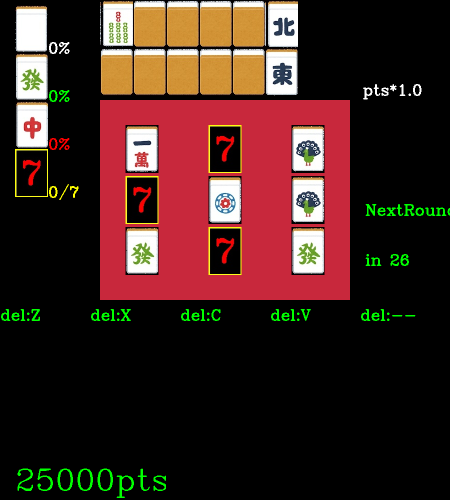

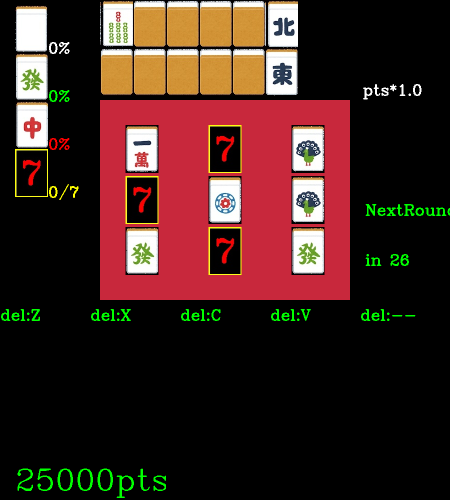

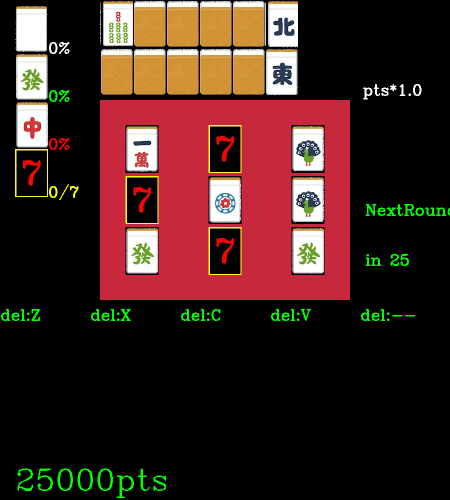

spin:


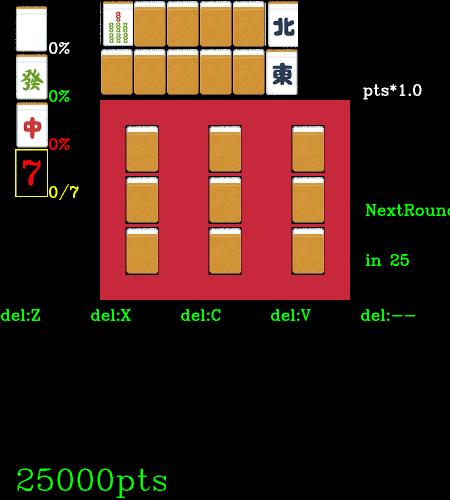

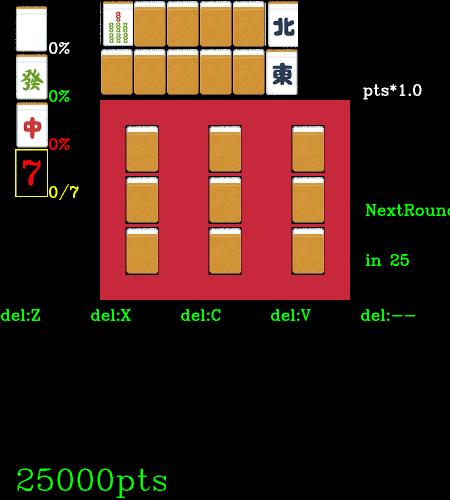

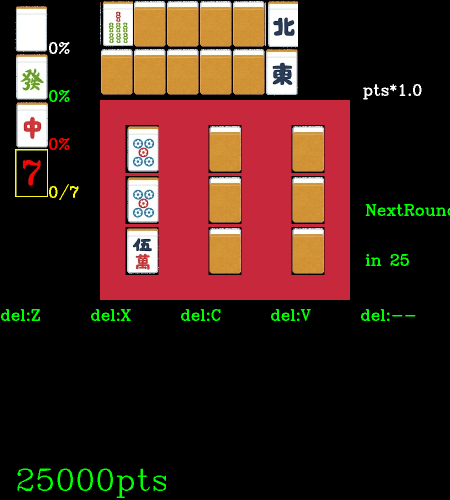

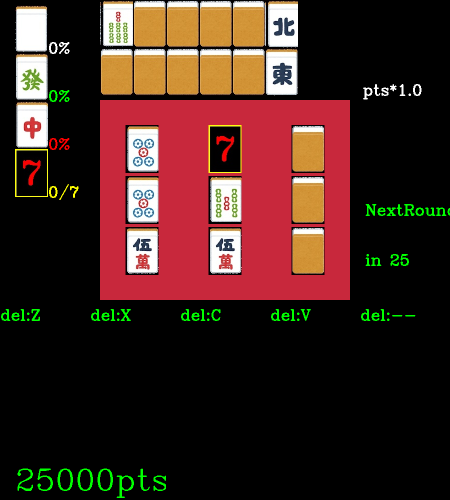

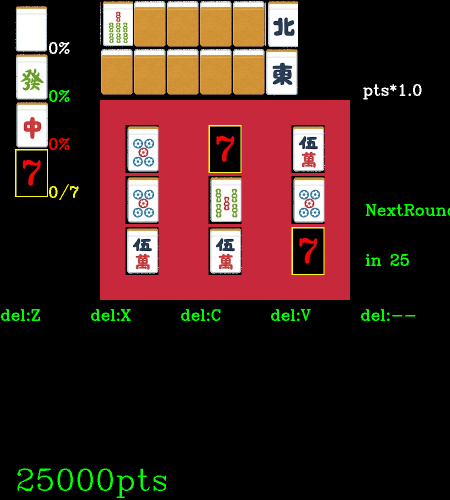

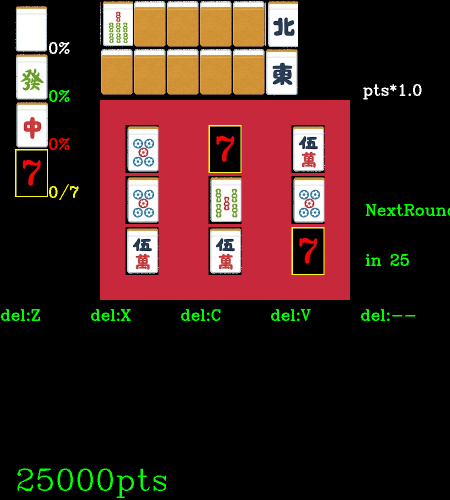

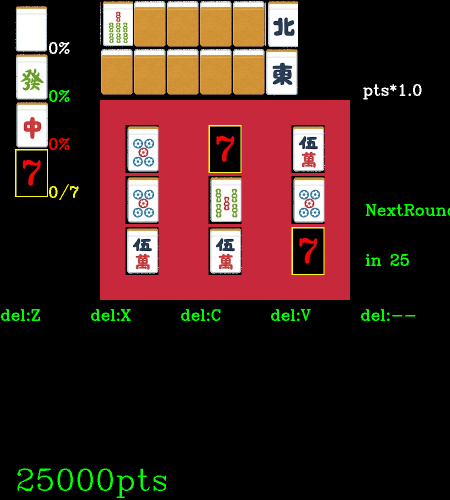

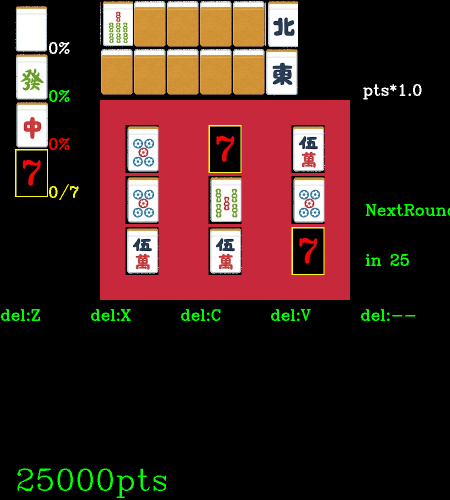

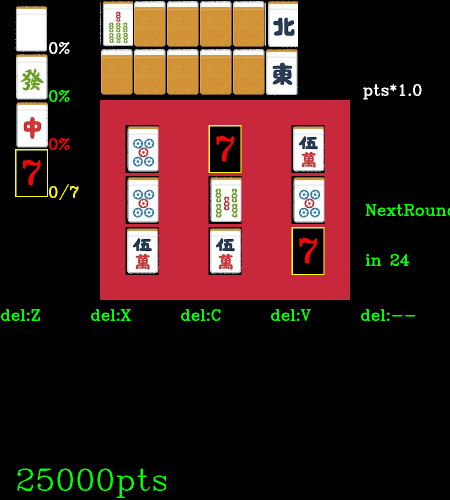

spin:


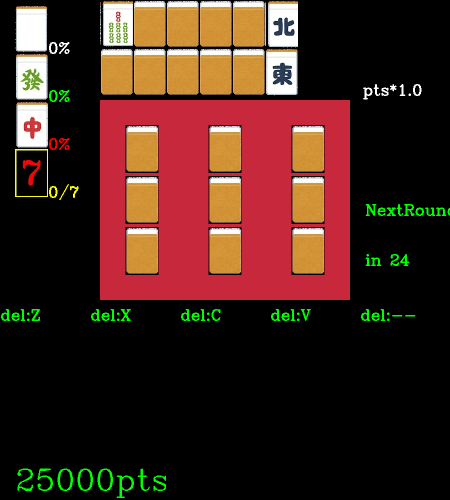

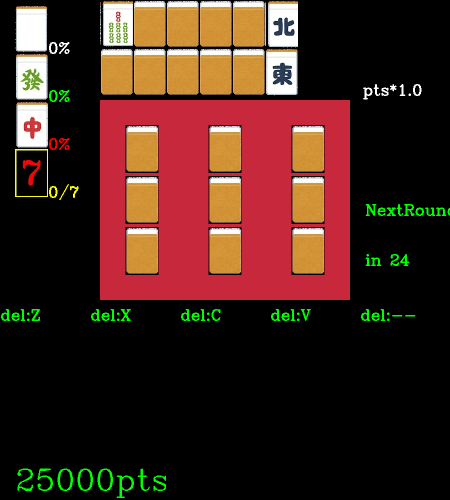

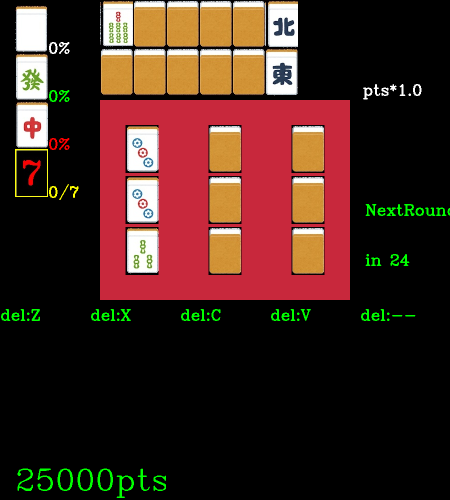

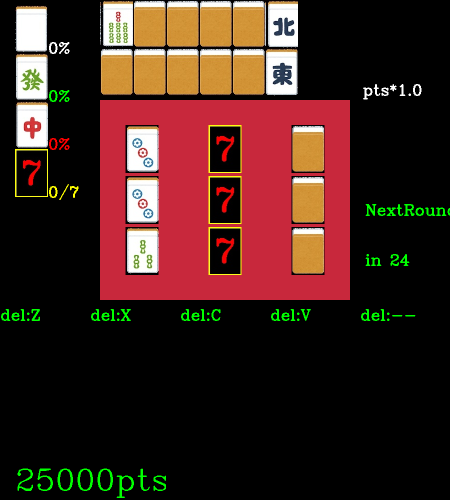

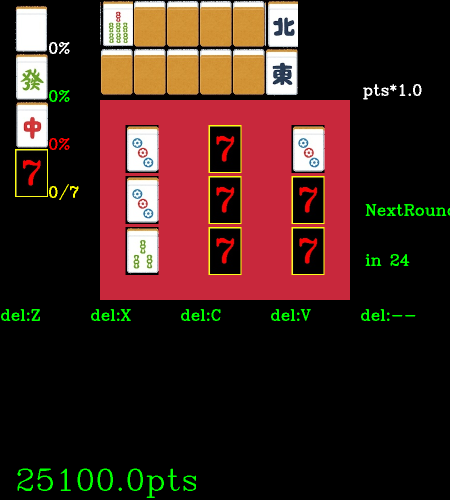

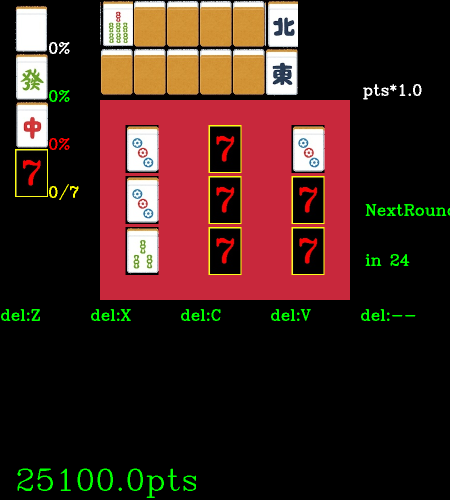

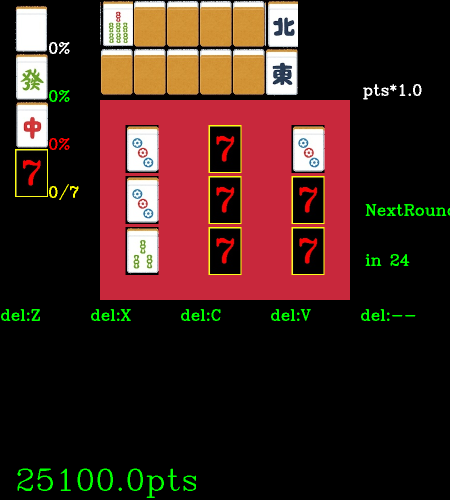

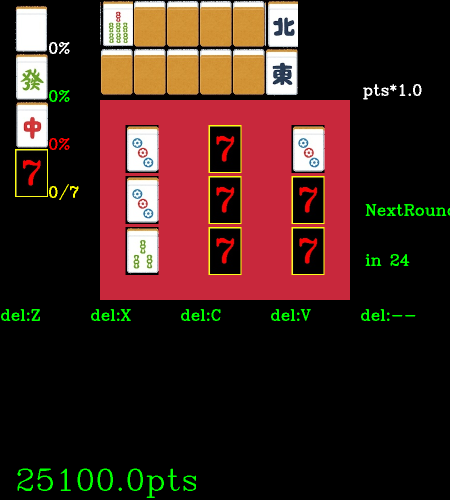

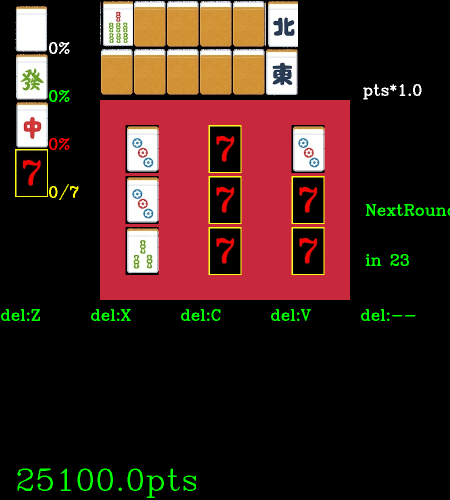

spin:


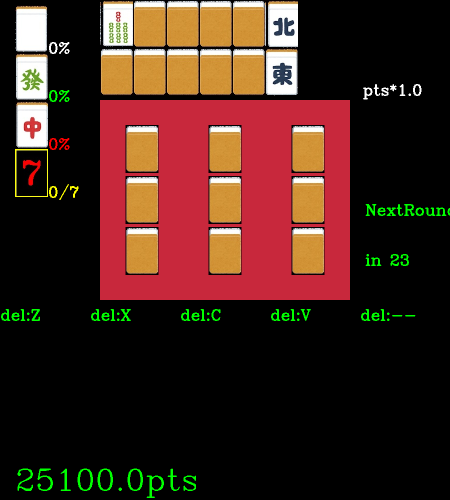

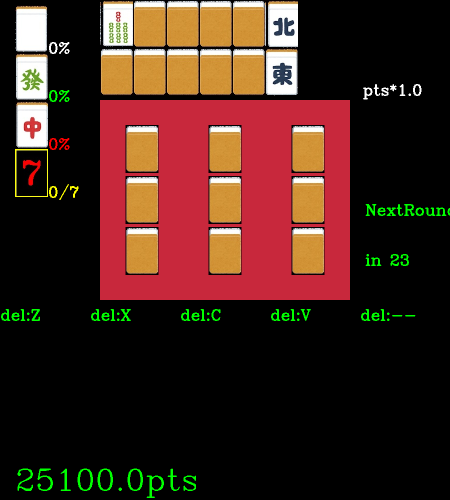

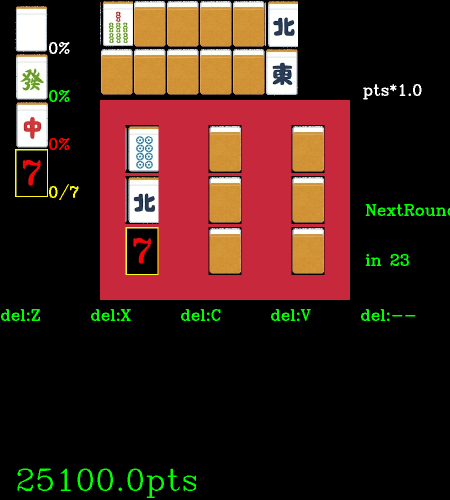

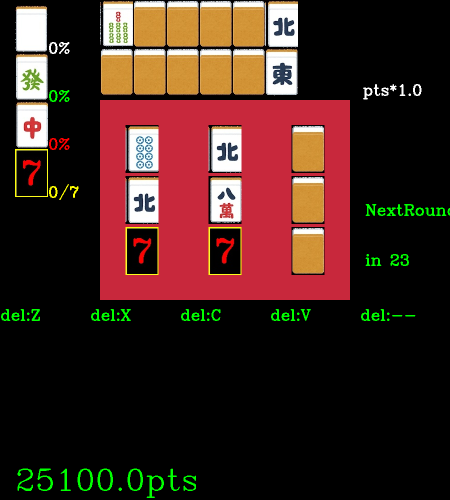

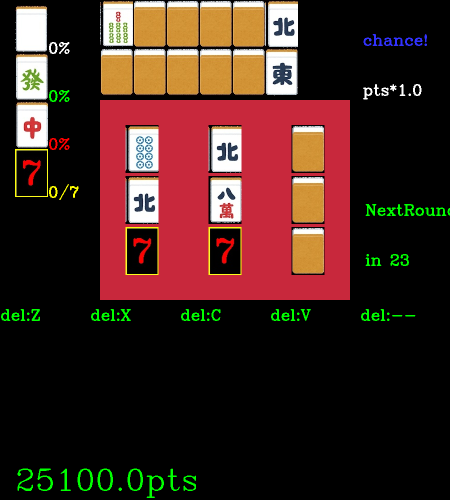

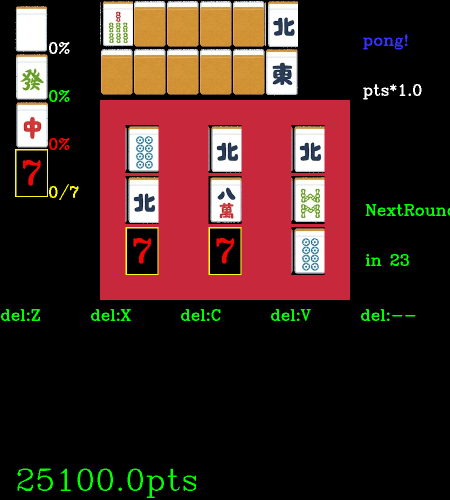

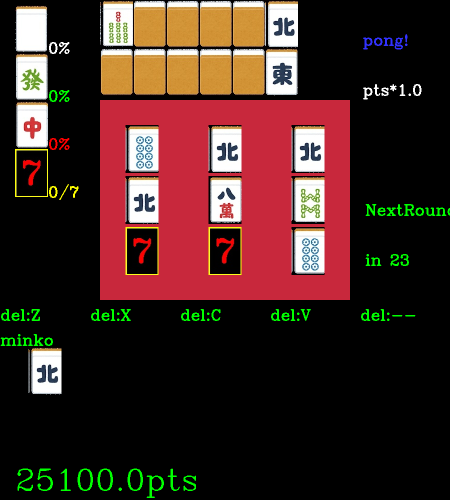

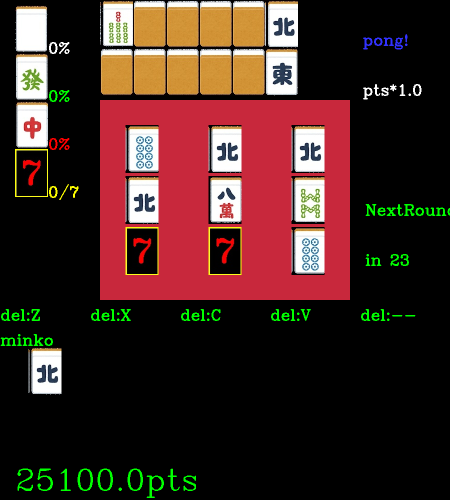

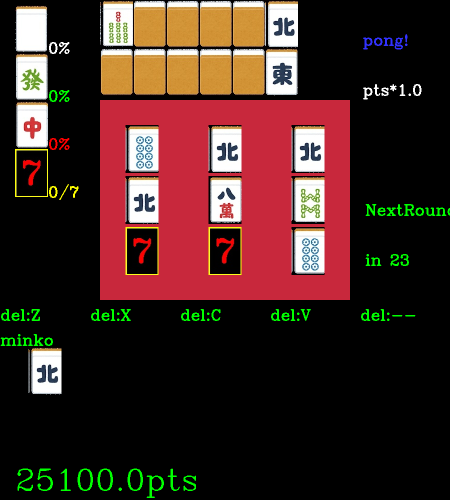

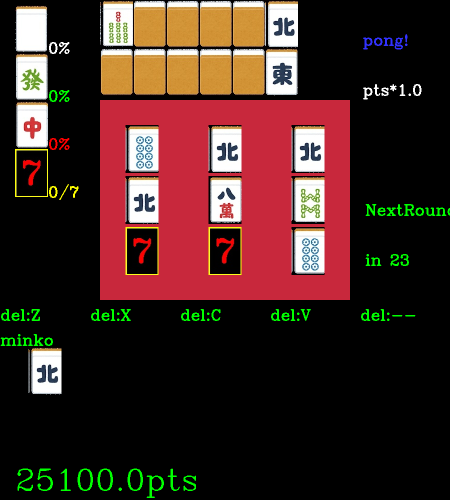

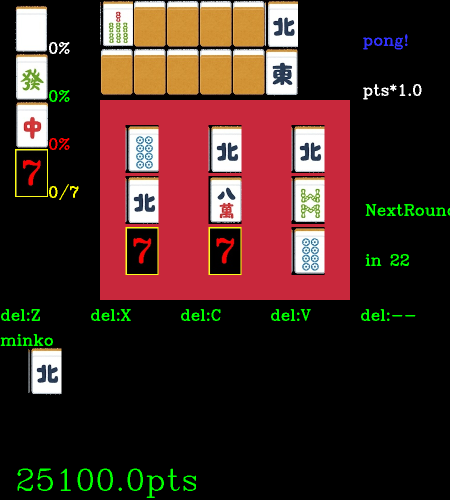

spin:


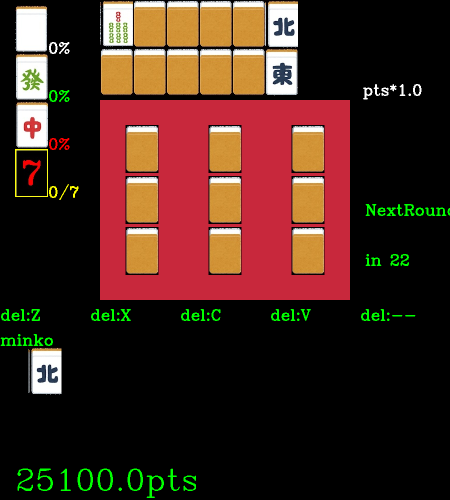

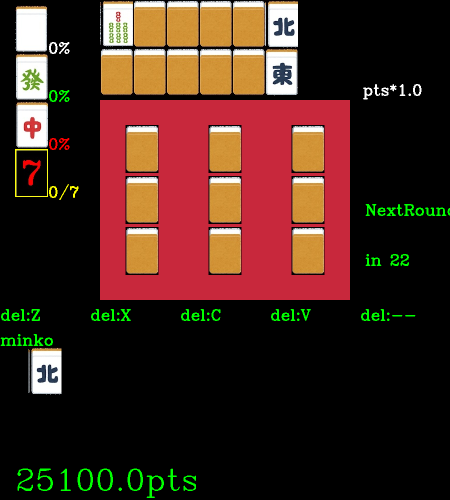

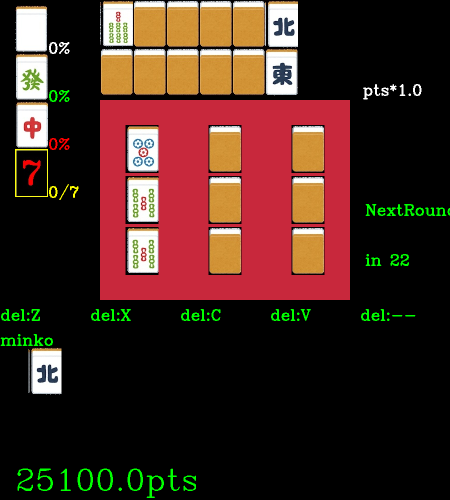

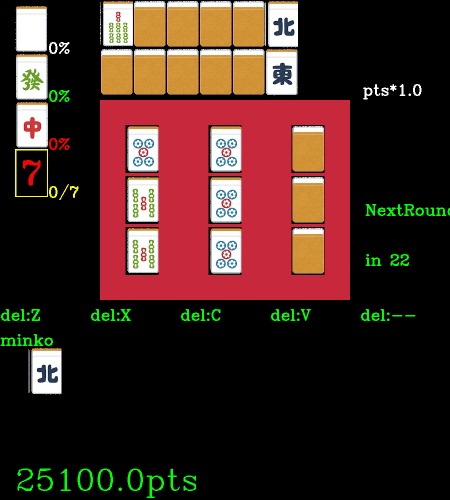

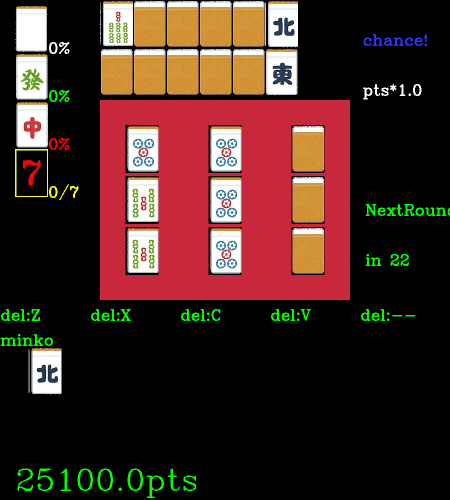

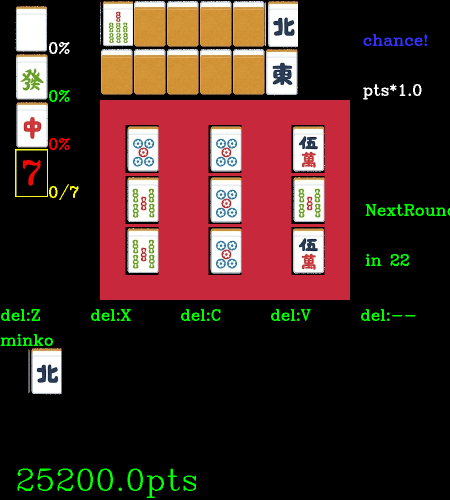

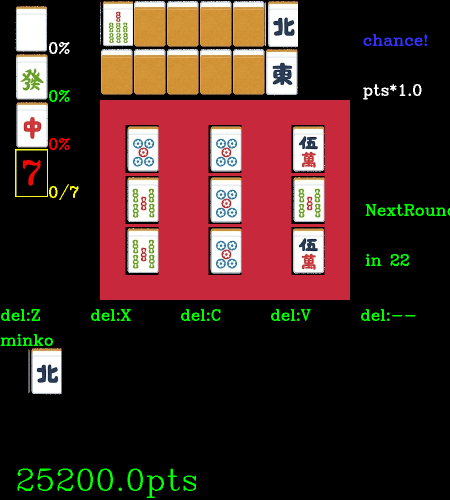

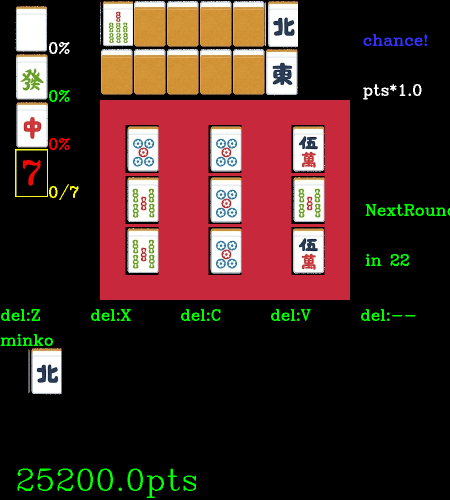

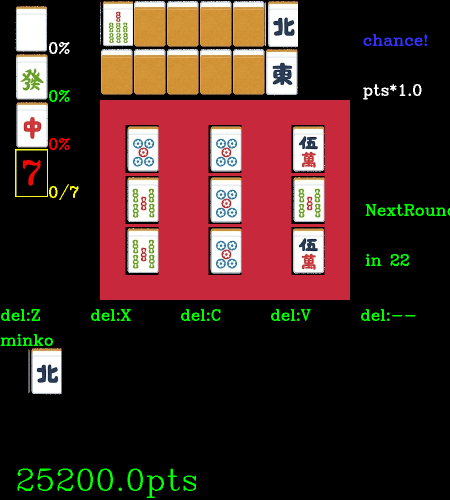

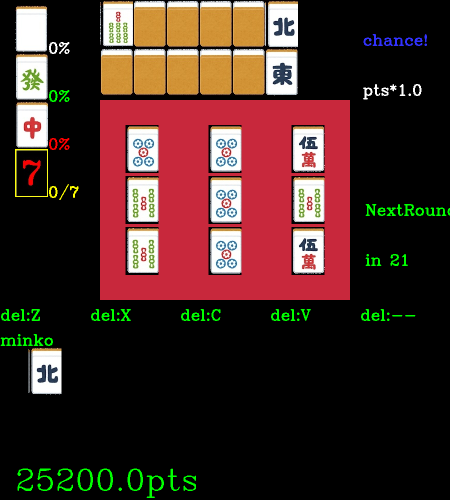

spin:


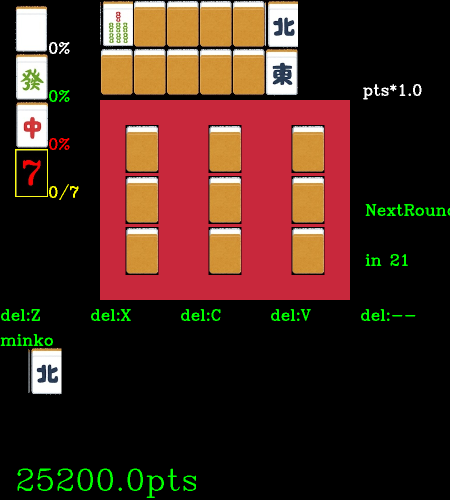

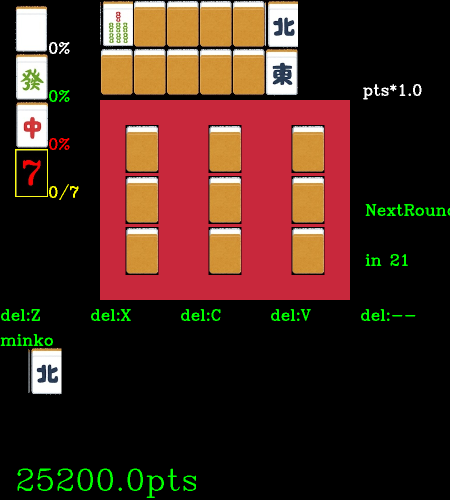

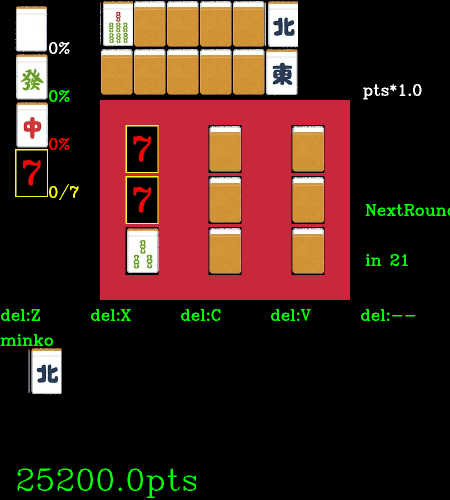

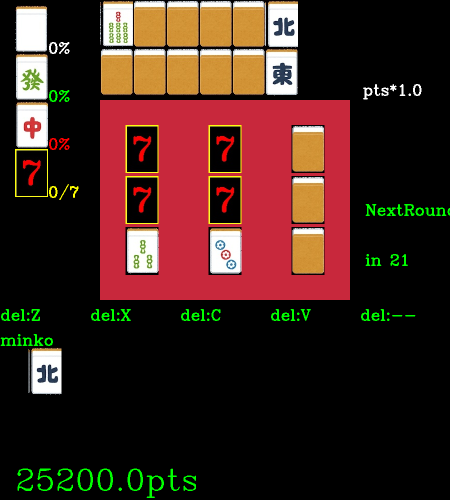

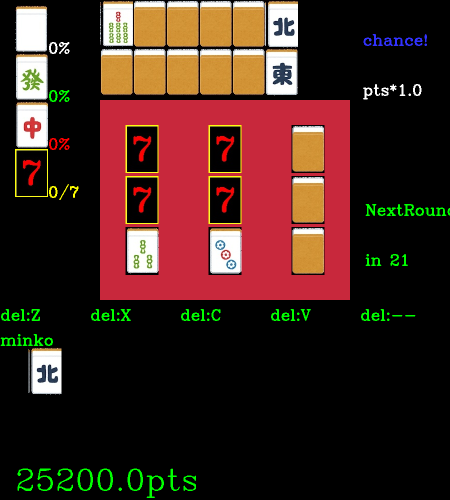

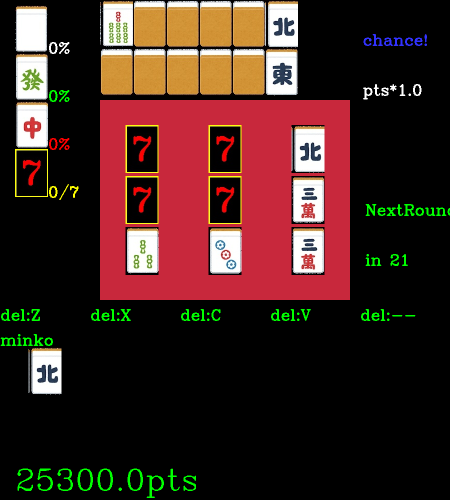

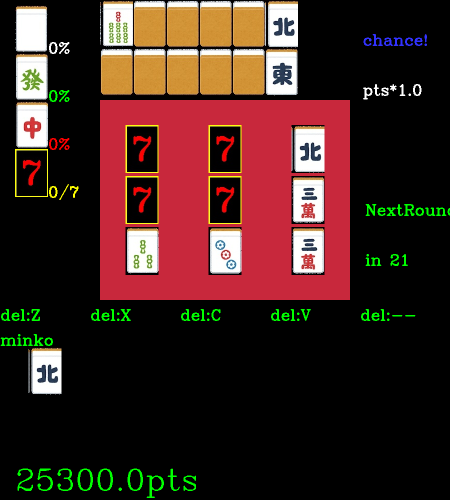

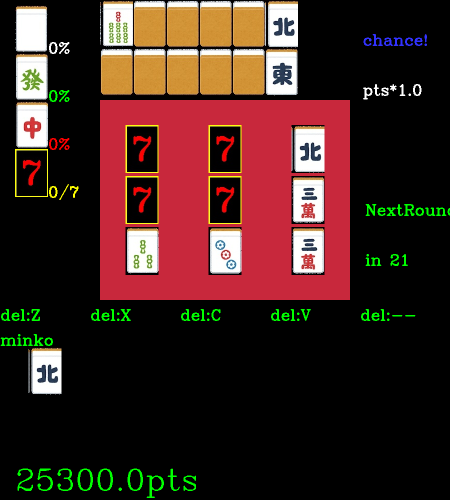

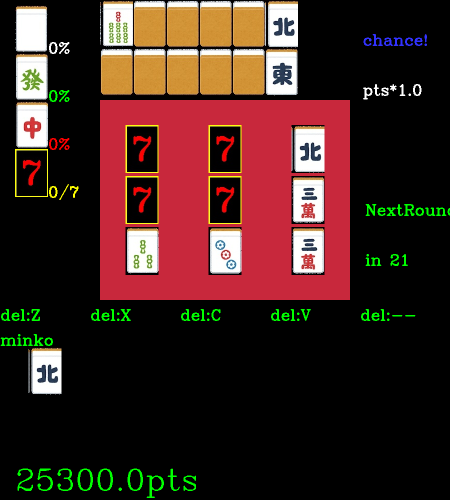

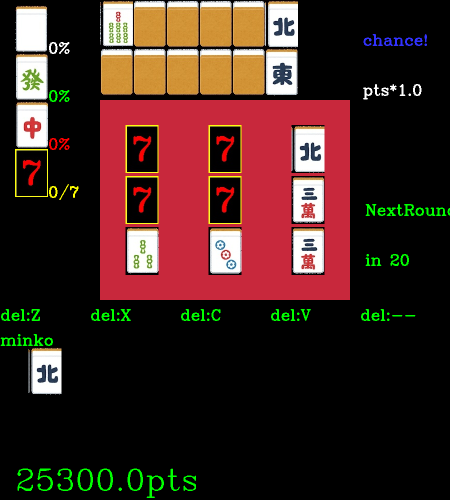

spin:


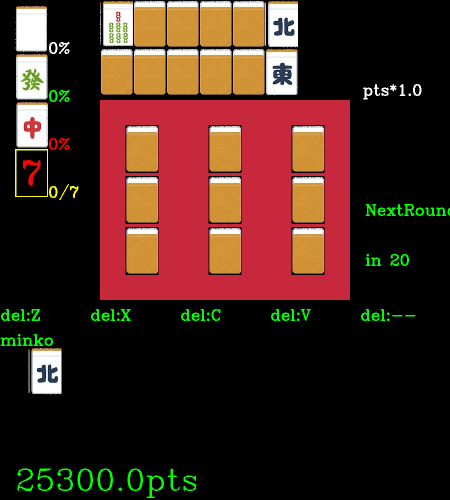

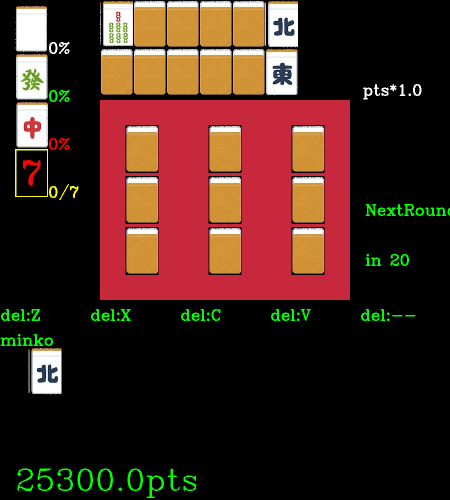

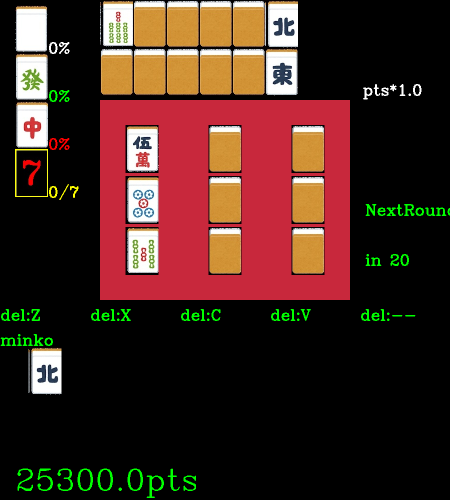

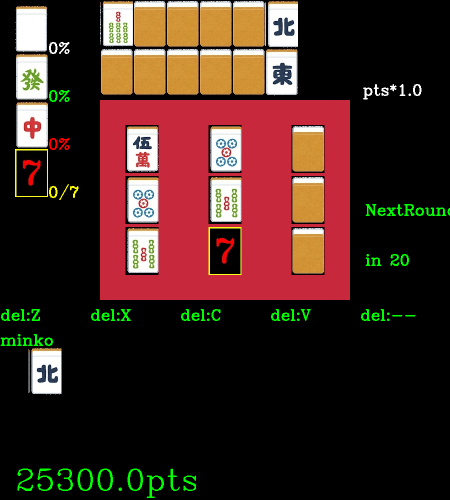

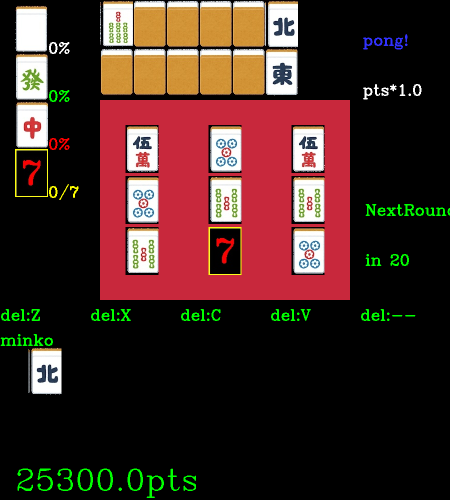

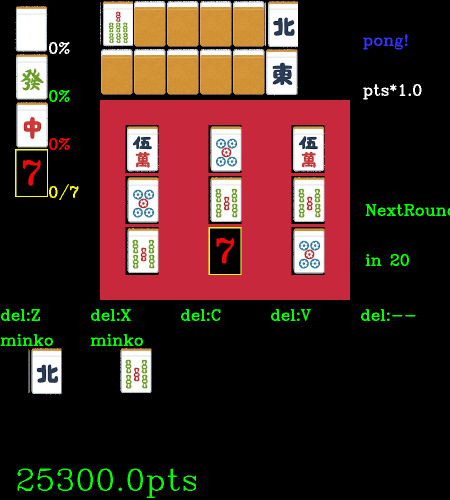

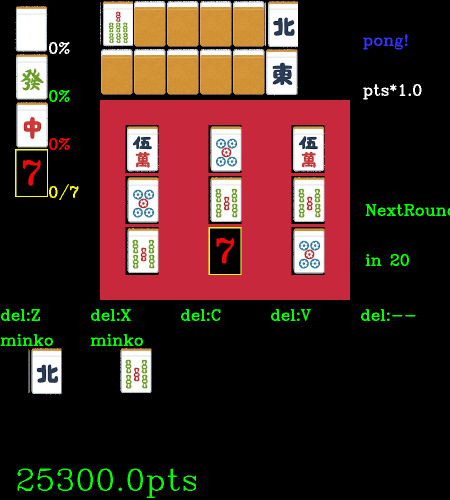

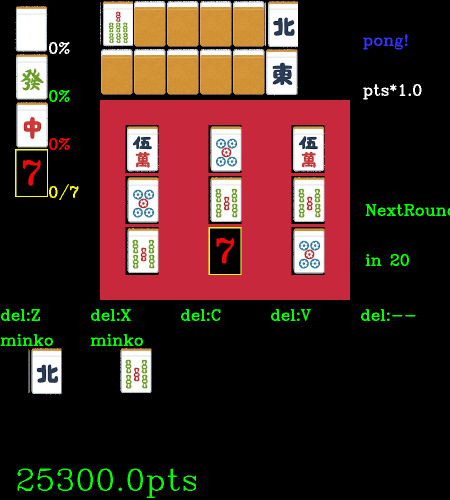

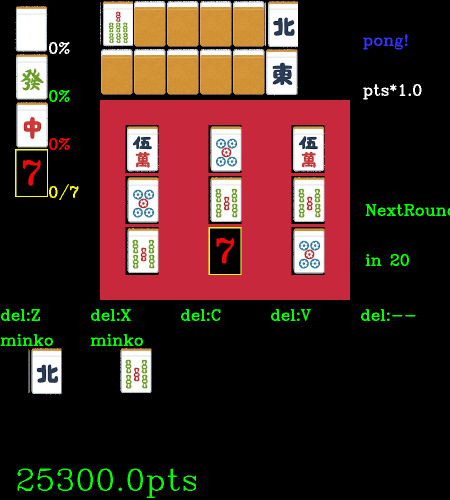

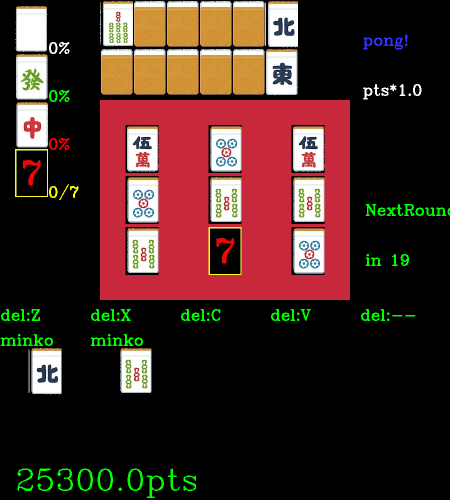

spin:


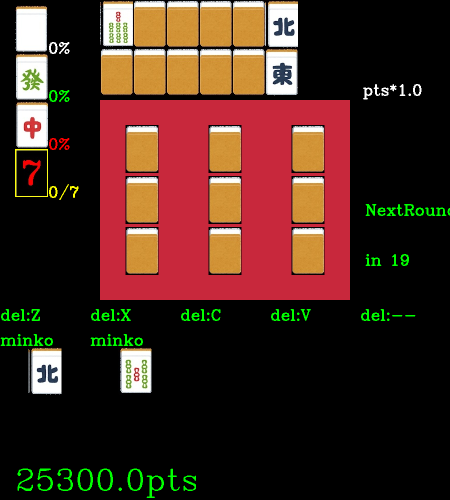

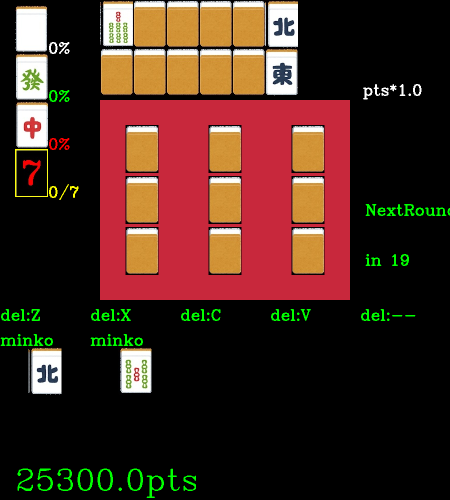

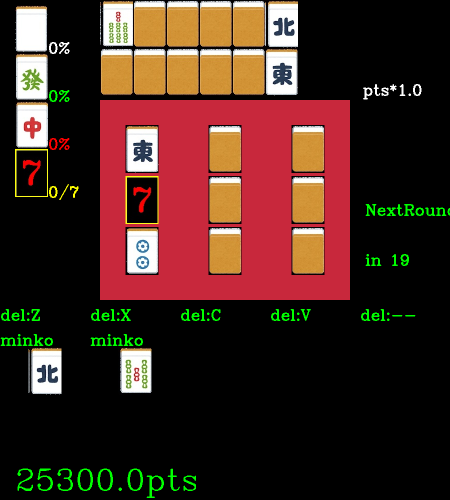

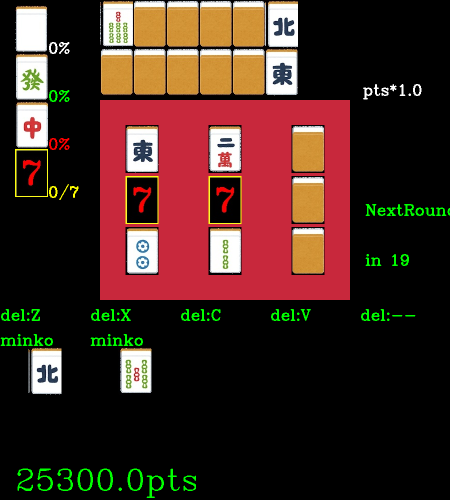

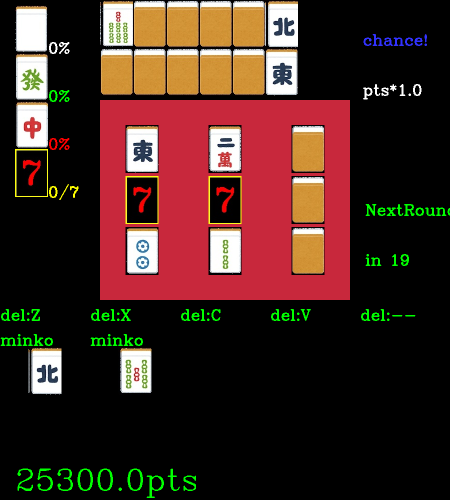

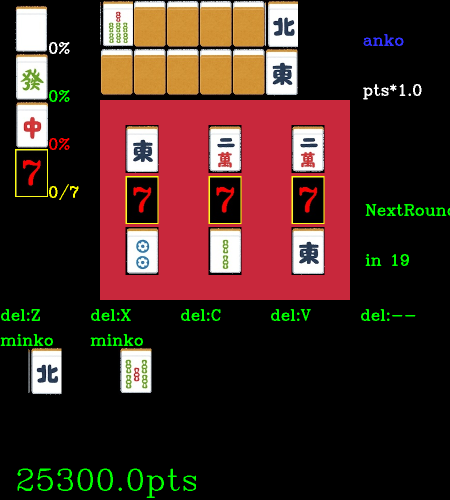

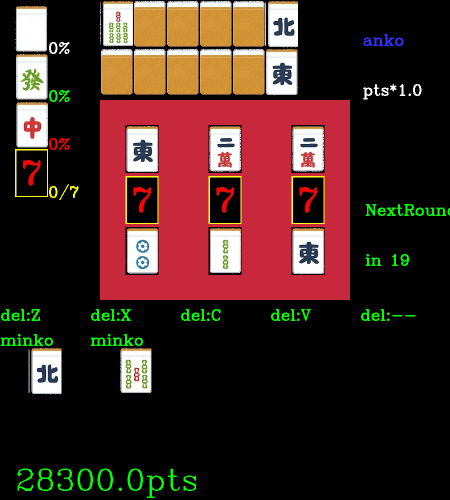

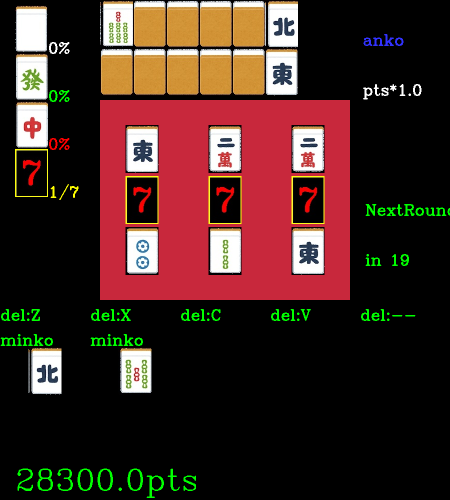

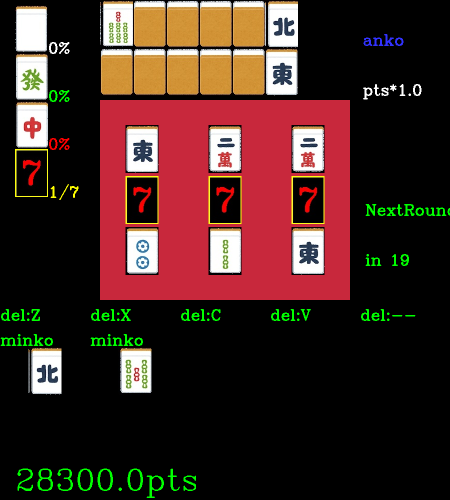

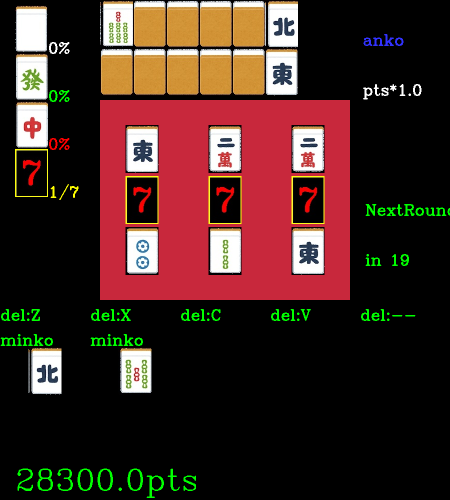

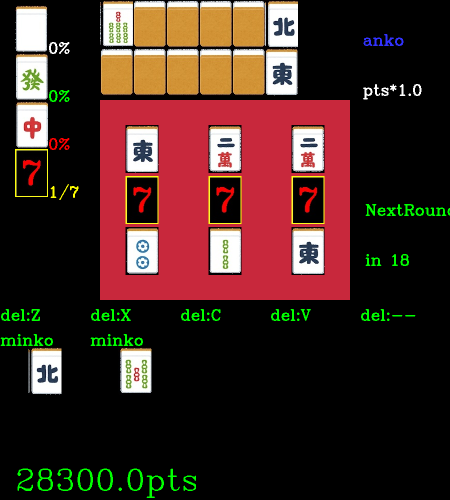

spin:


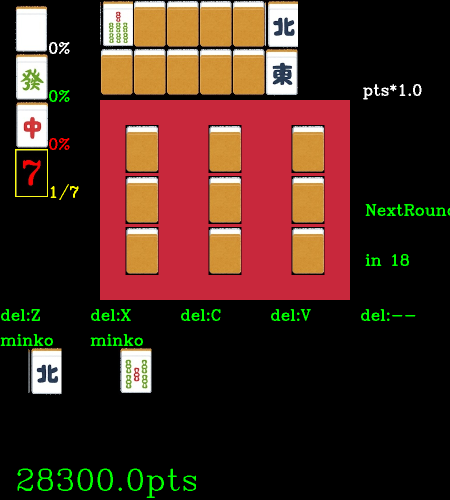

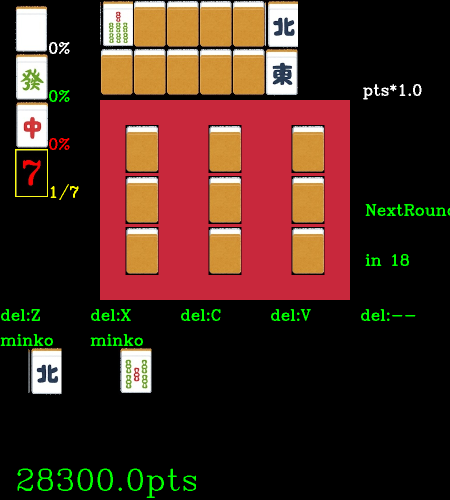

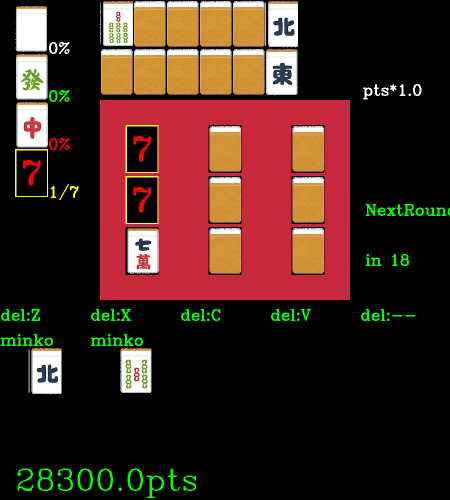

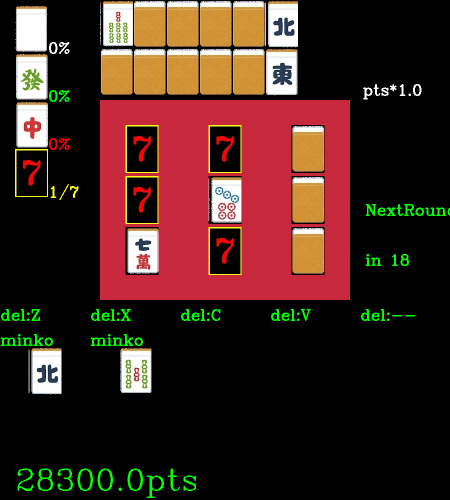

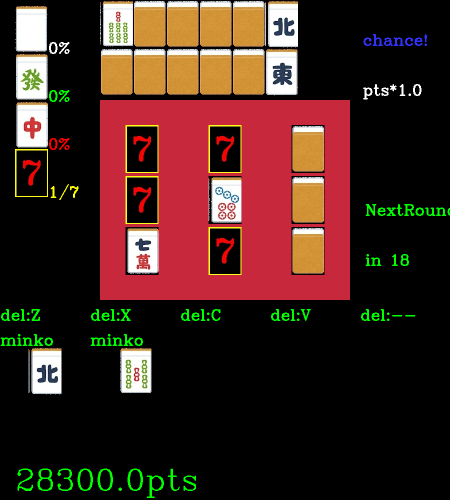

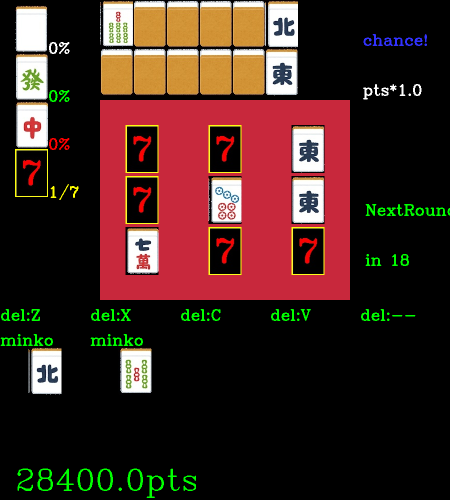

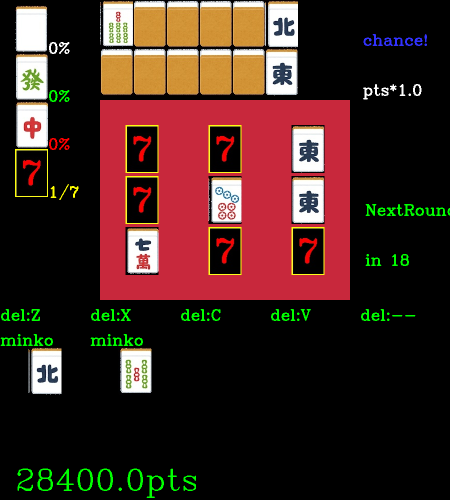

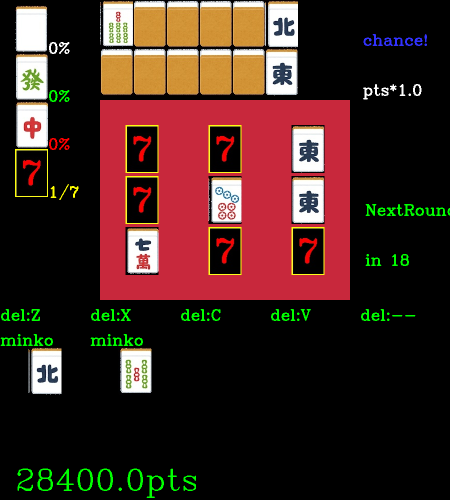

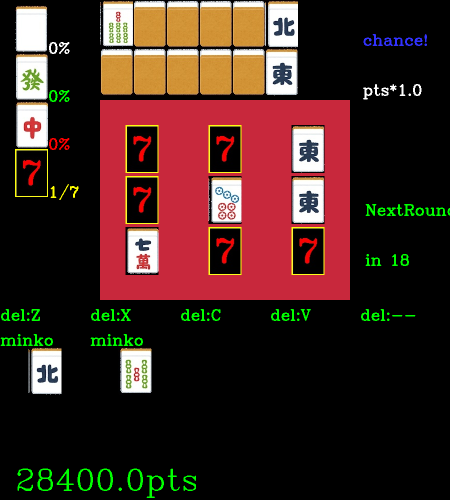

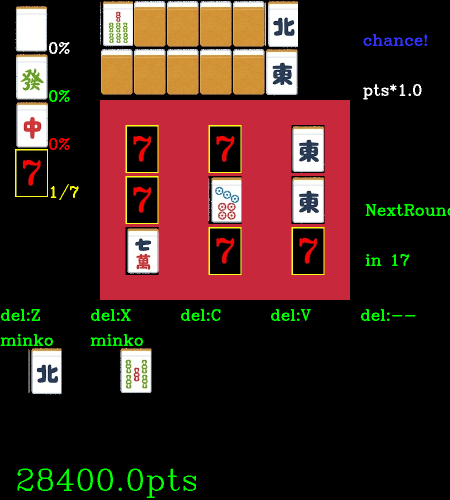

spin:


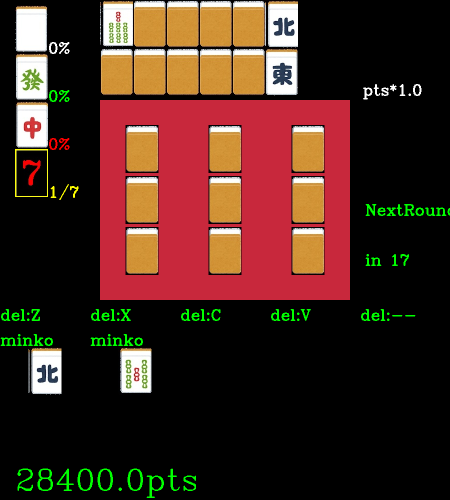

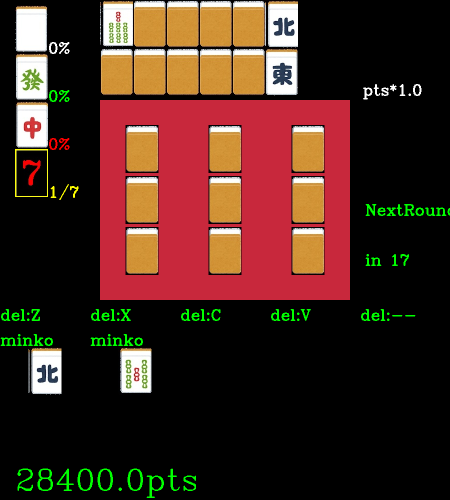

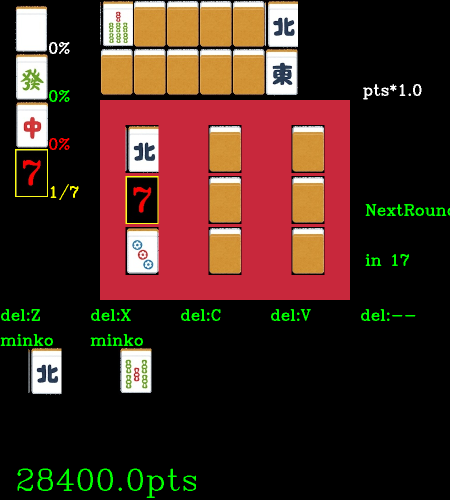

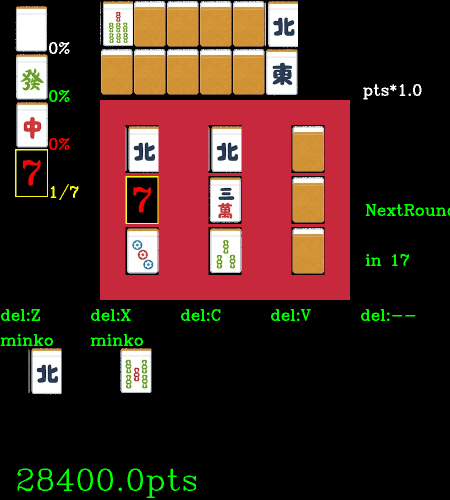

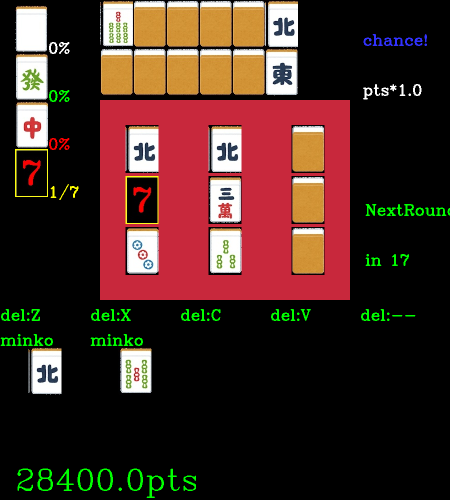

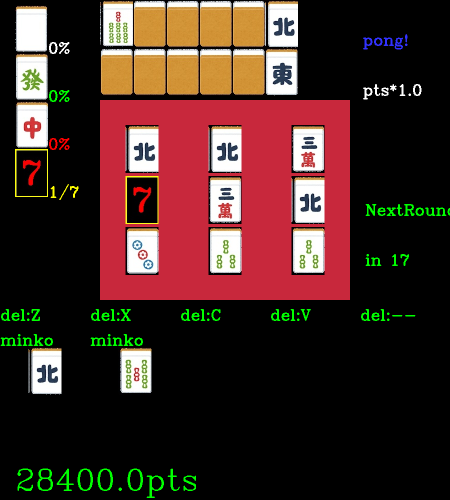

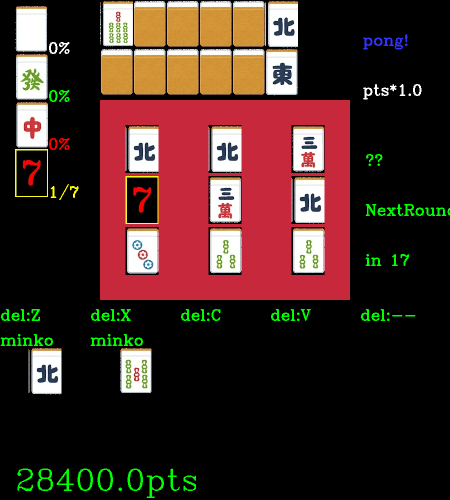

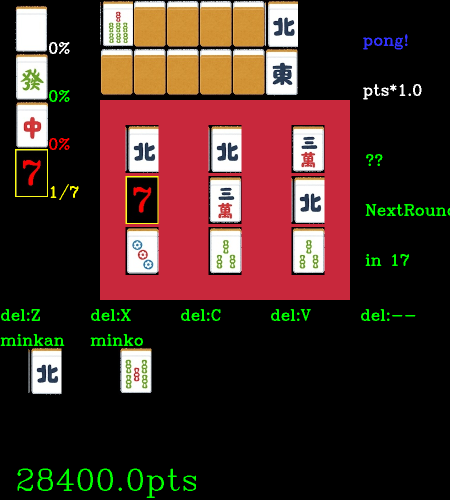

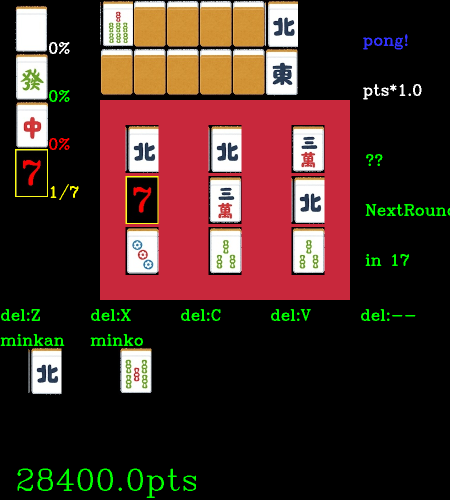

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [95]:

# 麻雀スロット　～対々和狂～

import glob
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow
import random
import collections
import sys
import time
import pandas as pd

# pngファイルをjpgファイルに変換
def p_to_j(png):
  inp=cv2.imread(png)
  out=cv2.imwrite(png.split(".")[0]+".jpg",inp,[int(cv2.IMWRITE_JPEG_QUALITY), 95])


# 画像ファイル初期化＝削除
def syokika():
  gabage=glob.glob("*"+".png")
  for file in gabage:
    os.remove(file)
  gabage=glob.glob("*"+".jpg")
  for file in gabage:
    os.remove(file)

# 画像取り込み
def import_png():
  !wget "https://1.bp.blogspot.com/-8P5zIo20u0M/WIW-PEzskrI/AAAAAAABBTA/z1LuZ7VuZp4jB8cVOTnaIDg7LEPS1NYeACLcB/s600/ma-jan1_manzu.png"
  !wget "https://1.bp.blogspot.com/-FkHa1pqdVL8/XV-ladNgcOI/AAAAAAABUO8/yhB4DrKbPoEA_c4SE0e3L_AGIqvRIDXvACLcBGAs/s600/ma-jan2_pinzu.png"
  !wget "https://3.bp.blogspot.com/-OnFCJiu4Vac/WIW-Pp-826I/AAAAAAABBTQ/M7N1QDjiVG4laTFhs3pgxa02Wv9A7r2vwCLcB/s600/ma-jan3_souzu.png"
  !wget "https://2.bp.blogspot.com/-fnePE7Hzjyk/WIW-Pgk7gCI/AAAAAAABBTM/T0IEhToKXNcYG4HkqS_s1jktiA9TBX_1ACLcB/s270/ma-jan4_sufonpai.png"
  !wget "https://3.bp.blogspot.com/-nyxm7Q7MJo4/WIW-Pwkt4PI/AAAAAAABBTU/tT-Rj34oEbccwTNf5LIqYkSFraDo0V48gCLcB/s200/ma-jan5_sangenpai.png"
  !wget "https://3.bp.blogspot.com/-nq3nEFUaCmk/WIW-P2RSlXI/AAAAAAABBTY/7BSX8c2OsNAfrPzycpz5-geEtCVhayXMgCLcB/s200/ma-jan6_akahai.png"
  !wget "https://3.bp.blogspot.com/-L7G0zYHK-Yo/WIW-P6VS1vI/AAAAAAABBTc/ZIWmuJ6MrLg-dEFOI0ABpuGePZ5HXQw_wCLcB/s97/ma-jan7_back.png"

# 縦96横66に切り出し
def img_div(img,n,name):
  for i in range(n):
    clp=img[0:96,i*66:i*66+66]
    cv2.imwrite(name+str(i+1)+".jpg",clp)

# スロット0とスロットシンボルから該当する牌種を特定
def mark_to_num(s0,mark,redpi):
  global jihai
  global bahai
  num=s0
  if mark=="7":
    num=777
  elif mark=="m":
    num+=0
    if redpi:
      num=35
  elif mark=="p":
    num+=9
    if redpi:
      num=36
  elif mark=="s":
    num+=18
    if redpi:
      num=37
  else:
    if s0==1:
      num=32
    elif s0==2:
      num=28
    elif s0==3:
      num=jihai
    elif s0==4:
      num=29
    elif s0==5:
      num==33
    elif s0==6:
      num=30
    elif s0==7:
      num=bahai
    elif s0==8:
      num=31
    else:
      num=34
  return num

# 牌種（数値）に対応する画像を返す  　　m1->m9.p1->p9,s1->s9,東西南北發中白の1~34 背面0 赤m35 赤p36 赤s37         ７マーク777 それ以外は暗黒
def num_to_img(a):
  if a<=34 and a!=0:
    b=a//9
    c=a%9
    if c==0:
      c=9

    if b==0:
      d="m"
    elif b==1:
      d="p"
    elif b==2:
      d="s"
    else:
      d="j"
    pai_name=d+str(c)
    img=cv2.imread(pai_name+".jpg")
  elif a==35:
    img=cv2.imread("rm5.jpg")
  elif a==36:
    img=cv2.imread("rp5.jpg")
  elif a==37:
    img=cv2.imread("rs5.jpg")
  elif a==777:
    img=cv2.imread("777.jpg")
  elif a==0:
    img=cv2.imread("b1.jpg")
  else:
    img=np.zeros((96,66,3),np.uint8)

  return img




# スロット結果決定　牌の種類が決まる
def slot():
  global spin_mode
  global spin_neg
  #spin抽選表示
  for i in range(9):
    slot_place(i,num_to_img(0))
  # スロット結果（隠し）決定　数牌の数字または字牌が決まる
  resu0=random.randint(1,9)
  if resu0==5 and random.random()<0.25:
    redpi=True
  else:
    redpi=False
  if spin_mode!="nomal":
    multi+=resu0/100
  ru("")
  resu=[]
  table=["j","m","p","s","7"]
  if spin_mode=="green":
    table=["j","m","p","s","7","s","s","s"]
  elif spin_mode=="white":
    table=["j","7"]
  while True:
    for i in range(9):
      resu.append(random.choice(table))
    kakutei=random.randint(1,1000) # 各列２％で暗刻上書き
    k=random.choice(table)
    kakutei_v=20
    if spin_mode=="red":
      kakutei_v=100
    if (kakutei>=500-kakutei_v//2 and kakutei<=500+kakutei_v//2) or spin_mode=="white":
      resu[1]=k
      resu[4]=k
      resu[7]=k
    elif kakutei<=kakutei_v:
      resu[0]=k
      resu[3]=k
      resu[6]=k
    elif kakutei>=1001-kakutei_v:
      resu[2]=k
      resu[5]=k
      resu[8]=k
    # 裏ドラ槓子を引いたときは再抽選
    for i in range(9):
      if len(spin_neg)!=0 and eqr(mark_to_num(resu0,resu[i],redpi),spin_neg[0]):
        continue
    break
  # スロットシンボル描写 チャンスだと待たせる 右端リール以外は赤ドラでも普通の牌描写
  for i in range(9):
    slot_place(i,num_to_img(0))
  show_img()
  time.sleep(2.0)
  for i in range(3):
    slot_place(i,num_to_img(mark_to_num(resu0,resu[i],False)))
  show_img()
  time.sleep(0.5)
  for i in range(3,6):
    slot_place(i,num_to_img(mark_to_num(resu0,resu[i],False)))
  show_img()
  if resu[0]==resu[3] or resu[1]==resu[4] or resu[2]==resu[5]:
    ru("chance!")
    time.sleep(2.0)
  else:
    time.sleep(0.5)
  for i in range(6,9):
    slot_place(i,num_to_img(mark_to_num(resu0,resu[i],redpi)))
  show_img


  cs1=collections.Counter([resu[1],resu[4],resu[7]]).most_common()
  cs2=collections.Counter([resu[0],resu[3],resu[6]]).most_common()
  cs3=collections.Counter([resu[2],resu[5],resu[8]]).most_common()
  # 当たり判定　暗刻
  if len(cs1)==1:
    mark=cs1[0][0]
    anko(mark_to_num(resu0,mark,redpi))
    return
  elif len(cs2)==1:
    mark=cs2[0][0]
    anko(mark_to_num(resu0,mark,redpi))
    return
  elif len(cs3)==1:
    mark=cs3[0][0]
    anko(mark_to_num(resu0,mark,redpi))
    return
  # 当たり判定　対子またはポン
  if len(cs1)==2:
    ma=cs1[0][0]
    if resu[1]!=ma:
      if resu[0]==ma or resu[2]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
    elif resu[4]!=ma:
      if resu[3]==ma or resu[5]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
    elif resu[7]!=ma:
      if resu[6]==ma or resu[8]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
  elif len(cs2)==2:
    ma=cs2[0][0]
    if resu[0]!=ma:
      if resu[1]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
    elif resu[3]!=ma:
      if resu[4]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
    elif resu[6]!=ma:
      if resu[7]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
  elif len(cs3)==2:
    ma=cs3[0][0]
    if resu[2]!=ma:
      if resu[1]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
    elif resu[5]!=ma:
      if resu[4]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return
    elif resu[8]!=ma:
      if resu[7]==ma:
        pon(mark_to_num(resu0,ma,redpi))
        return
      else:
        toitu(mark_to_num(resu0,ma,redpi))
        return




# 1スロットの描写
def slot_place(n,img):
  global img_base
  cenh=img_base.shape[0]//2
  cenw=img_base.shape[1]//2

  inw=n//3-1
  inh=n%3-1

  min_w=cenw+166*inw-33
  max_w=cenw+166*inw+33

  min_h=cenh+102*inh-48
  max_h=cenh+102*inh+48
  img_base[min_h:max_h,min_w:max_w]=img







#  ドラリスト　 引数は王牌
def dorajudge(wan_dora):
  global tehai
  kansu=1
  if len(tehai)!=0:
    for i in range(len(tehai)):
      if tehai.iat[i,1]=="ankan" or tehai.iat[i,1]=="minkan":
        kansu+=1

  wan_dora_h=wan_dora[kansu]
  doralist=[]
  for dora in wan_dora_h:
    if dora<=27 and dora%9==0:
      doralist.append(dora-8)
    elif dora==31:
      doralist.append(dora-3)
    elif dora==34:
      doralist.append(dora-2)
    else:
      doralist.append(dora+1)
  return doralist

#  赤ドラ対策済同一牌種判定
def eqr(num1,num2):
  if num1==num2:
    return True
  elif {num1,num2}=={5,35} or {num1,num2}=={14,36} or {num1,num2}=={23,37}:
    return True
  else:
    return False
#  暗刻処理
def anko(num):
  global spin_mode
  global tehai
  global wan_dora
  global kan
  ru("anko")
  if num==777 or spin_mode=="777":
    anko777()
    return
  if num==32:
    anko_g()
  if num==33 or (num>=35 and num<=37):
    anko_r()
  # fin は手牌操作完了フラグ
  fin=False
  # 手牌が空なら追加
  if len(tehai)==0:
    new_te={"牌種":num,"刻子種類":"anko","残りスピン":20}
    df_new=pd.DataFrame(new_te,index=[0])
    tehai=pd.concat([tehai,df_new],ignore_index=True)
  else:
    for i in range(len(tehai)):
      # 既に同じ牌種を持っているなら
      if eqr(tehai.iat[i,0],num):
        # その刻子の残りスピン数を＋１０
        tehai.iat[i,2]+=10
        # 赤ドラを引いたなら、牌種を赤ドラのものに変更
        if num>=35 and num<=37:
          tehai.iat[i,0]=num
        fin=True
        # 暗刻持ちなら暗槓に、明刻持ちなら明槓に。残りスピン数を追加で＋１０
        if tehai.iat[i,1]=="anko" and num not in wan_dora:
          tehai.iat[i,1]="ankan"
          info("暗槓")
          tehai.iat[i,2]+=10
          kan=2
        elif tehai.iat[i,1]=="minko" and num not in wan_dora:
          tehai.iat[i,1]="minkan"
          info("加槓")
          tehai.iat[i,2]+=10
          kan=2
        # 槓子持ちなら残りスピン数を追加で＋40
        elif tehai.iat[i,1]=="ankan" or tehai.iat[i,1]=="minkan":
          tehai.iat[i,2]+=40
        break
    # 手牌は空でないかつ牌種を持っていないなら
    if fin==False:
      new_te={"牌種":num,"刻子種類":"anko","残りスピン":20}
      df_new=pd.DataFrame(new_te,index=[0])
      tehai=pd.concat([tehai,df_new],ignore_index=True)


#  ポン処理
def pon(num):
  global spin_mode
  global tehai
  global wan_dora
  global kan
  ru("pong!")
  if num==777 or spin_mode=="777":
    pon777()
    return
  if num==32:
    pon_g()
  if num==33 or (num>=35 and num<=37):
    pon_r()
  fin=False
  # 手牌が空なら追加
  if len(tehai)==0:
    new_te={"牌種":num,"刻子種類":"minko","残りスピン":20}
    df_new=pd.DataFrame(new_te,index=[0])
    tehai=pd.concat([tehai,df_new],ignore_index=True)
  else:
    for i in range(len(tehai)):
      # 既に同じ牌種を持っているなら
      if eqr(tehai.iat[i,0],num):
        # その刻子の残りスピン数を＋１０
        tehai.iat[i,2]+=10
        # 赤ドラを引いたなら、牌種を赤ドラのものに変更
        if num>=35 and num<=37:
          tehai.iat[i,0]=num
        fin=True
        # 明槓に変更。暗槓なら大明槓表示、明槓なら残りスピン数を追加で＋１０
        if tehai.iat[i,1]=="anko" and num not in wan_dora:
          info("大明槓")
          tehai.iat[i,1]="minkan"
          tehai.iat[i,2]+=10
          kan=2
        elif tehai.iat[i,1]=="minko" and num not in wan_dora:
          info("加槓")
          tehai.iat[i,1]="minkan"
          tehai.iat[i,2]+=10
          kan=2
        # 槓子持ちなら残りスピン数を追加で＋40
        elif tehai.iat[i,1]=="ankan" or tehai.iat[i,1]=="minkan":
          tehai.iat[i,2]+=40
        break
    # 手牌は空でないかつ牌種を持っていないなら
    if fin==False:
      new_te={"牌種":num,"刻子種類":"minko","残りスピン":20}
      df_new=pd.DataFrame(new_te,index=[0])
      tehai=pd.concat([tehai,df_new],ignore_index=True)
#  対子処理
def toitu(num):
  global spin_mode
  global tehai
  global point
  if num==777 or spin_mode=="777":
    toitu777()
    return
  fin=False
  # 手牌が空なら何もなし。あるなら
  if len(tehai)!=0:
    for i in range(len(tehai)):
      # 既に同じ牌種を持っているなら
      if eqr(tehai.iat[i,0],num):
        # その刻子の残りスピン数を＋5
        tehai.iat[i,2]+=5
        # 赤ドラを引いたなら、牌種を赤ドラのものに変更
        if num>=35 and num<=37:
          tehai.iat[i,0]=num
        fin=True
        # 槓はできない
        # 槓子持ちなら残りスピン数を追加で＋40
        if tehai.iat[i,1]=="ankan" or tehai.iat[i,1]=="minkan":
          tehai.iat[i,2]+=40
        break
    # 手牌は空でないかつ牌種を持っていない
    if fin==False:
      if len(tehai)!=4:
        # かつ聴牌ではないなら何もなし
        point+=100
      # 聴牌ならば手牌に追加
      else:
        new_te={"牌種":num,"刻子種類":"toitu","残りスピン":20}
        df_new=pd.DataFrame(new_te,index=[0])
        tehai=pd.concat([tehai,df_new],ignore_index=True)

# 手牌データセット   牌種(0無、1~34),刻子種類,残りスピン
def tehaisyoki():
  df=pd.DataFrame(columns=["牌種","刻子種類","残りスピン"])
  return df




# 34種の牌から牌種を1つ決定 ただし[neg]に含まれないもの
def pai_one(neg):
  while True:
    a=random.randint(1,34)
    if len(neg)==0 or a not in neg:
      break
  return a



# ドラ牌決定　同じものが出た場合は再抽選
def det_dora():
  dora=[]
  for i in range(5):
    d=pai_one(dora+[777])
    dora.append(d)
  return dora

# 裏ドラ牌決定１　カン １％確率でドラ牌を除く牌種で裏ドラ槓子
def ura1(dora):
  global spin_neg
  uradora=[]
  if random.randint(1,100)==1:
    ura=pai_one(wan_dora+[777])
    for i in range(5):
      uradora.append(ura)
    spin_neg=[ura]
    uradora.append(pai_one(dora+spin_neg))
  return uradora

# 裏ドラ牌決定２　和了時に裏ドラが決まっていなければ裏ドラ抽選
def ura2(dora,uradora):
  if len(uradora)==0:
    for i in range(4):
      ura=pai_one(dora+uradora+[777])
      uradora.append(ura)
  return uradora

def gase(spin_mode,pt):
  global red_gase
  global green_gase
  global t7_gase
  if pt!=0:
    if spin_mode=="red":
      red_gase+=pt
    elif spin_mode=="green":
      green_gase+=pt
    elif spin_mode=="777":
      t7_gase+=pt
  else:
    if spin_mode=="red":
      red_gase=0
    elif spin_mode=="green":
      green_gase=0
    elif spin_mode=="777":
      t7_gase=0

def anko777():
  global multi
  global point
  global spin_count
  spin_count+=10
  point+=3000*multi
  if spin_mode!="777":
    gase("777",1)

def pon777():
  global multi
  global point
  global spin_count
  point+=1000*multi
  spin_count+=5

def toitu777():
  global multi
  global point
  point+=100*multi

def anko_g():
  gase("green",20)

def anko_r():
  gase("red",10)

def pon_g():
  gase("green",3)

def pon_r():
  gase("red",1)
#!
def info(strs):
  global spin_count
  global img_under
  global img_info
  img_info=np.zeros((400,200,3),np.uint8)
  cv2.putText(img_info,text=strs,org=(30,130),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,255,0),thickness=2)
  cv2.putText(img_info,text="NextRound",org=(30,230),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,255,0),thickness=2)
  cv2.putText(img_info,text="in "+str(spin_count),org=(30,330),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,255,0),thickness=2)
  img_under[200:600,700:900]=img_info
  show_img()
def dora_view(wandora,uradora,tehai,uramise):
  global img_under
  global jihai
  global bahai
  global img_dora
  global wan_dora
  global ura_dora
  kansu=1
  if len(tehai)!=0:
    for i in range(len(tehai)):
      if tehai.iat[i,1]=="ankan" or tehai.iat[i,1]=="minkan":
        kansu+=1
  img_dora=np.zeros((192,396,3),np.uint8)
  for i in range(1,6):
    if i<=kansu:
      img_dora[0:96,66*(i-1):66*i]=num_to_img(wan_dora[i-1])
    else:
      img_dora[0:96,66*(i-1):66*i]=num_to_img(0)
  for i in range(1,6):
    if i<=kansu and uramise and len(ura_dora)<=i:
      img_dora[96:192,66*(i-1):66*i]=num_to_img(ura_dora[i-1])
    else:
      img_dora[96:192,66*(i-1):66*i]=num_to_img(0)
    img_dora[0:96,330:396]=num_to_img(jihai)
    img_dora[96:192,330:396]=num_to_img(bahai)
  show_img()

def tehai_view(tehai):
  global img_tehai
  img_tehai=np.zeros((400,900,3),np.uint8)
  drop_id=["Z","X","C","V","--"]
  for i in range(5):
    cv2.putText(img_tehai,text="del:"+drop_id[i],org=(180*i,40),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,255,0),thickness=2)
  for i in range(len(tehai)):
    cv2.putText(img_tehai,text=tehai.iat[i,1],org=(180*i,90),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,255,0),thickness=2)
    img_tehai[94:190,57+180*i:123+180*i]=num_to_img(tehai.iat[i,0])
  cv2.putText(img_tehai,text=str(point)+"pts",org=(30,380),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=2.0,color=(0,255,0),thickness=2)
  show_img()
def fever():
  global img_fever
  img_fever=np.zeros((400,200,3),np.uint8)
  img_fever[10:106,30:96]=num_to_img(34)
  cv2.putText(img_fever,text=str(white_gase)+"%",org=(96,106),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(255,255,255),thickness=2)
  img_fever[106:202,30:96]=num_to_img(32)
  cv2.putText(img_fever,text=str(green_gase)+"%",org=(96,202),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,255,0),thickness=2)
  img_fever[202:298,30:96]=num_to_img(33)
  cv2.putText(img_fever,text=str(red_gase)+"%",org=(96,298),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,0,255),thickness=2)
  img_fever[298:394,30:96]=num_to_img(777)
  cv2.putText(img_fever,text=str(t7_gase)+"/7",org=(96,394),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(0,255,255),thickness=2)
  show_img()

def ru(strs=""):
  global img_ru
  global multi
  img_ru=np.zeros((200,200,3),np.uint8)
  cv2.putText(img_ru,text=strs,org=(25,90),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(255,50,50),thickness=2)
  cv2.putText(img_ru,text="pts*"+str(multi),org=(25,190),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1.0,color=(255,255,255),thickness=2)
  show_img()

# img_base img_under img_info img_dora img_tehai img_fever img_ru
def show_img():
  global img_under
  global img_fever
  global img_dora
  global img_info
  global img_base
  global img_tehai
  global img_ru
  img_under[0:400,0:200]=img_fever
  img_under[0:192,200:596]=img_dora
  img_under[200:600,700:900]=img_info
  img_under[200:600,200:700]=img_base
  img_under[600:1000,0:900]=img_tehai
  img_under[0:200,700:900]=img_ru

  cv2_imshow(cv2.resize(img_under,(450,500)))

def winpts(tehai):
  yakulist=[]
  yakumanlist=[]
  # 対々和
  hon=2
  syu=set(list(tehai["刻子種類"]))
  pnum=set(list(tehai["牌種"]))
  # 赤ドラ
  red_hon=0
  s_akadora_list=[35,36,37]
  for i in range(len(tehai)):
    if tehai.iat[i,0] in s_akadora_list:
      red_hon+=1
  if red_hon!=0:
    hon+=red_hon
    yakulist.append("赤ドラ "+str(red_hon))
  # 面前判定
  naki=0
  for i in range(len(tehai)):
    if tehai.iat[i,1]=="minko" or tehai.iat[i,1]=="minkan":
      naki+=1
  # tehはtehaiの赤ドラを普通牌に置き換えたもの
  teh=tehai
  for i in range(len(tehai)):
    if teh.iat[i,0]==35:
      teh.iat[i,0]=5
    if teh.iat[i,0]==36:
      teh.iat[i,0]=14
    if teh.iat[i,0]==37:
      teh.iat[i,0]=23
  syu=set(list(teh["刻子種類"]))
  pnum=set(list(teh["牌種"]))
  # suuhaiはtehの字牌部分を除いたもの
  suuhai=teh[teh["牌種"]<=27]["牌種"]

  # ドラ
  s_dora_list=dorajudge(wan_dora)
  dora_hon=0
  for i in range(len(teh)):
    if teh.iat[i,0] in s_dora_list:
      if teh.iat[i,1]=="ankan" or teh.iat[i,1]=="minkan":
        dora_hon+=4
      elif teh.iat[i,1]=="anko" or teh.iat[i,1]=="minko":
        dora_hon+=3
      else:
        dora_hon+=2
  if dora_hon!=0:
    hon+=dora_hon
    yakulist.append("ドラ "+str(dora_hon))
  # 裏ドラ
  s_uradora_list=dorajudge(ura_dora)
  ura_hon=0
  for i in range(len(teh)):
    if teh.iat[i,0] in s_uradora_list:
      if teh.iat[i,1]=="ankan" or teh.iat[i,1]=="minkan":
        ura_hon+=4
      elif teh.iat[i,1]=="anko" or teh.iat[i,1]=="minko":
        ura_hon+=3
      else:
        ura_hon+=2
  if ura_hon!=0:
    hon+=ura_hon
    yakulist.append("裏ドラ "+str(ura_hon))

  #　面前自摸
  if syu.isdisjoint(set(["minko","minkan","toitu"])):
    hon+=1
    yakulist.append("面前自摸")
  #  立直
  if tenpai>=2:
    hon+=1
    yakulist.append("立直")
  #  一発
  if tenpai>=3:
    hon+=1
    yakulist.append("一発")
  # タンヤオ
  if pnum.isdisjoint(set([1,9,10,18,19,27,28,29,30,31,32,33,34,777,0])):
    hon+=1
    yakulist.append("断么九")
  # 白
  if 34 in pnum:
    hon+=1
    yakulist.append("白")
  # 發
  if 32 in pnum:
    hon+=1
    yakulist.append("發")
  # 中
  if 33 in pnum:
    hon+=1
    yakulist.append("中")
  # 自牌
  tonpe=["東","南","西","北"]
  if jihai in pnum:
    hon+=1
    yakulist.append("自:"+tonpe[jihai-28])
  # 場牌
  if bahai in pnum:
    hon+=1
    yakulist.append("他:"+tonpe[bahai-28])
  # 嶺上開花
  if kan>=1:
    hon+=1
    yakulist.append("嶺上開花")
  # 海底
  if spin_count==0:
    hon+=1
    yakulist.append("海底撈月")
  # 三暗刻
  if list(teh["刻子種類"])[:3].count("anko")+list(teh["刻子種類"])[:3].count("ankan")==3:
    hon+=2
    yakulist.append("三暗刻")
  # 三色同刻
  doko=False
  for i in range(1,10):
    if set(list(teh["牌種"])[:3])>{i,i+9,i+18}:
      doko=True
      break
  if doko:
    hon+=2
    yakulist.append("三色同刻")
  # 混老頭
  if pnum<set([1,9,10,11,18,19,27,28,29,30,31,32,33,34]):
    hon+2
    yakulist.append("混老頭")
  # 小三元
  if pnum>set([32,33,34]) and list(teh["牌種"])[4] in [32,33,34]:
    hon+=2
    yakulist.append("小三元")
  # 三槓子
  if list(teh["刻子種類"]).count("ankan")+list(teh["刻子種類"]).count("minkan")==3:
    hon+=1
    yakulist.append("三槓子")
  # 清一色
  tinitu=False
  if len(pnum)==len(suuhai):
    for i in range(3):
      tinitu_l=[]
      for j in range(1,10):
        tinitu_l.append(j+9*i)
      if len(suuhai)>0 and set(list(suuhai))<tinitu_l:
        tinitu=True
        break
    if tinitu:
      tinitu_h=6-naki
      if tinitu_h>0:
        hon+=tinitu_h
        yakulist.append("清一色")

  #　混一色
  else:
    honitu_j=False
    for i in range(3):
      honitu_j_l=[]
      for j in range(1,10):
        honitu_j_l.append(j+9*i)
      if len(suuhai)>0 and set(list(suuhai))<honitu_j_l:
        honitu_j=True
        break
    if honitu_j:
      honitu_h=3-naki
      if honitu_h>0:
        hon+=honitu_h
        yakulist.append("混一色")
  # 役満
  yakuman=0
  # 天和 　地和
  if tenho<=5 and naki==0:
    yakuman+=2
    yakumanlist.append("天和")
  elif tenho<=10 and naki==0:
    yakuman+=1
    yakumanlist.append("地和")
  # 緑一色
  if pnum<set([20,21,22,24,26,32]):
    yakuman+=1
    yakumanlist.append("緑一色")
  # 大三元
  if list(teh["牌種"])[4] not in [32,33,34] and pnum>{32,33,34}:
    yakuman+=1
    yakumanlist.append("大三元")
  # 字一色
  if pnum<{28,29,30,31,32,33,34}:
    yakuman+=1
    yakumanlist.append("字一色")
  # 清老頭
  if pnum<{1,9,10,18,19,27}:
    yakuman+=1
    yakumanlist.append("清老頭")
  # 四槓子
  if list(teh["刻子種類"]).count("ankan")+list(teh["刻子種類"]).count("minkan")==4:
    yakuman+=1
    yakumanlist.append("四槓子")
  # 四暗刻、四暗刻単騎
  if naki==0 and teh.iat[4,1]=="anko":
    if spin_mode!="nomal":
      yakuman+=2
      yakumanlist.append("四暗刻")
    else:
      yakuman+=1
      yakumanlist.append("四暗刻単騎")
  # 大四喜、小四喜
  if pnum>{28,29,30,31}:
    if naki!=0:
      yakuman+=2
      yakumanlist.append("大四喜")
    else:
      yakuman+=1
      yakumanlist.append("小四喜")
  # 数え役満
  if yakuman==0:
    if hon>=13:
      yakuman=hon//13
      yakulist_end="数え役満*"+str(yakuman)
    yakulist.append(str(hon)+"翻"+" "+yakulist_end)
    p_list=yakulist
  else:
    p_list=yakumanlist
  # 点数計算
  if yakuman==0:
    if hon<=4:
      pts=2000*(hon-1)
    elif hon==5:
      pts=8000
    elif hon<=7:
      pts=12000
    elif hon<=10:
      pts=16000
    else:
      pts=24000
  else:
    pts=32000*yakuman
  # 親なら１．５倍
  if jihai==28:
    pts+=pts//2
  p_list.append(str(pts)+"点")
  if os.path.isfile("/content/slot_result.txt"):
    txt="a"
  else:
    txt="w"
  with open("slot_result.txt",txt,encoding="utf-8")as fw:
    fw.write(p_list)
    fw.write("\n")
  info("win"+str(pts))
  return pts











# プログラム本体
# 画像取り込み

# 画像データ初期化、取り込み
syokika()
import_png()

# jpg変換、ソート
originals=glob.glob("*.png")

for file in originals:
  img=cv2.imread(file)
  p_to_j(file)

# 画像分割
j_files=sorted(glob.glob("*.jpg"))
for file in j_files:
  img=cv2.imread(file)
  num=img.shape[1]//66
  namels=["m","p","s","w","g","r","b"]
  img_div(img,num,namels[j_files.index(file)])

# 画像"777.jpg"
img_7=np.zeros((96,66,3),np.uint8)
cv2.putText(img_7,text="7",org=(11,70),fontFace=cv2.FONT_HERSHEY_TRIPLEX,fontScale=2.2,color=(0,0,255),thickness=4)
cv2.rectangle(img_7,pt1=(0,0),pt2=(66,96),color=(0,255,255),thickness=3)
cv2.imwrite("777.jpg",img_7)

# 名前変更
os.rename("r1.jpg","rm5.jpg")
os.rename("r2.jpg","rp5.jpg")
os.rename("r3.jpg","rs5.jpg")
os.rename("g1.jpg","j7.jpg")
os.rename("g2.jpg","j5.jpg")
os.rename("g3.jpg","j6.jpg")
os.rename("w1.jpg","j1.jpg")
os.rename("w2.jpg","j2.jpg")
os.rename("w3.jpg","j3.jpg")
os.rename("w4.jpg","j4.jpg")


# 画像素材完了
# スロット内部プログラム
img_base=np.full((400,500,3),(60,40,200),np.uint8)
img_under=np.zeros((1000,900,3),np.uint8)
img_info=np.zeros((400,200,3),np.uint8)
img_dora=np.zeros((192,396,3),np.uint8)
img_tehai=np.zeros((400,900,3),np.uint8)
img_fever=np.zeros((400,200,3),np.uint8)
img_ru=np.zeros((200,200,3),np.uint8)

# 自牌、場牌、王牌

point=25000          # プレイヤーの持ち点
jihai=random.choice([28,29,30,31]) # 自風決定
syokijihai=jihai                   # 最初の自風記録　自風が変わった時に最初と同じになっている＝一周しているなら場が変わる
bahai=28                           # 東場スタート

tehai=tehaisyoki()
mode={"nomal":0,"red":0,"green":0,"white":0,"777":0}         #　red_zone/green_storm/white_birth/777:フィーバー終了までの残りスピン数（nomalの値は常に０）
spin_mode="nomal"
tenpai=0             # 聴牌判定定義 　0聴牌ではない　　１聴牌（立直ではない）　２立直  3立直一発
win=False            # 和了判定定義
tenho=0              # 天和判定数字リセット
kan=0                # 嶺上開花判定
multi=1.00           # フィーバー時の倍率
# フィーバーゲージ
red_gase=0
green_gase=0
white_gase=0
t7_gase=0
spin_neg=[]  #裏ドラ槓子用

first_resu=[]
first_table=["j","m","p","s","7"]
for i in range(9):
  first_resu.append(random.choice(first_table))
for i in range(9):
  slot_place(i,num_to_img(mark_to_num(1,first_resu[i],True)))


print("Press SpaceKey to Spin")
#print("Rule...")

# 和了または風変化またはスロット開始
while point>=0:

  spin_count=30        # 1スピン毎に減少 0スピンで""流局"、リセット。和了した時もリセット。次の局へ進む


  wan_dora=det_dora()  # 王牌上段決定
  ura_dora=ura1(wan_dora)      # 1%確率で裏ドラ槓子　その場合その牌種をspin_negに入れ、スロット抽選には出現しない
  if len(ura_dora)!=0:
    spin_neg=ura_dora[0]
  info("")
  tehai_view(tehai)
  dora_view(wan_dora,ura_dora,tehai,False)
  fever()
  show_img()

# spin_count=0で流局する。それまでは一局内
  while spin_count>=0:
    spin_count-=1
    # tenho<=5で和了すると天和、<=10で地和
    if tenho<=10:
        tenho+=1
    # ドラ描写更新
    dora_view(wan_dora,ura_dora,tehai,False)
    info("")
    # フィーバーモードの残りスピン数
    if spin_mode!="nomal":
      mode[spin_mode]-=1
    # スロット入力＆打牌受付
    while True:
      cmd=input("spin:")
      if len(cmd)==0:
        break
      if cmd[0]=="z" and len(tehai)>=1:
        tehai=tehai.drop(tehai.index[0])
        time.wait(0.5)
      if cmd[0]=="x" and len(tehai)>=2:
        tehai=tehai.drop(tehai.index[1])
        time.wait(0.5)
      if cmd[0]=="c" and len(tehai)>=3:
        tehai=tehai.drop(tehai.index[2])
        time.wait(0.5)
      # 立直中は打牌不可
      if cmd[0]=="v" and len(tehai)==4:
        if tenpai<=1:
          tehai=tehai.drop(tehai.index[3])
          tenpai=0
        else:
          print("You can't discard tile when you are calling 'Reach'")
      if cmd[0]=="e":
        sys.exit("End Ggame. Your score is "+str(point-25000))
      else:
        break
    # スロット実行。手牌が変わるかも
    slot()
      #mode change? 優先度　777>red>green>white>nomal
    if white_gase>=100:
      mode["white"]=30
    if green_gase>=100:
      mode["green"]=30
    if red_gase>=100:
      mode["red"]=30
    if t7_gase>=7:
      mode["777"]=77

    if mode[spin_mode]==0:
      gase(spin_mode,0)
      if mode["777"]!=0:
        spin_mode="777"
      elif mode["red"]!=0:
        spin_mode="red"
      elif mode["green"]!=0:
        spin_mode="green"
      elif mode["white"]!=0:
        spin_mode="white"
      else:
        spin_mode=="nomal"
        multi=1.00
    # 手牌表示欄更新
    tehai_view(tehai)
    # フィーバー欄更新
    fever()
    #ドラ欄更新
    dora_view(wan_dora,ura_dora,tehai,False)
    # slot後聴牌になったなら聴牌処理　聴牌フラグTrue　spin_count/mode/tehai"残りスピン数"+5
    if len(tehai)==4 and tenpai==0:
      tenpai=1
      spin_count+=5
      if kan>=1:
        kan-=1
      # spin_modeがnomalでないなら+5スピン
      if spin_mode!="nomal":
        mode[spin_mode]+=5
        for i in range(len(tehai)):
          tehai.iat[i,2]+=5
      if len(tehai[tehai["刻子種類"]=="minko"])+len(tehai[tehai["刻子種類"]=="minkan"])==0:  # 明刻,明槓子ともに無しなら
        info("!Reach!")  # 立直表示
        tenpai=3
      else:
        info("Ready!") # 聴牌チャンス表示
    # slot後和了したら
    elif len(tehai)>=5:

      win=True
      break
    # 新しく聴牌でも上りもしない
    else:
      #一発なら一発解除
      if tenpai==3:
        tenpai=2
      # 嶺上開花
      if kan>=1:
        kan-=1


  # 局終了
  if win:  # 終了理由が和了
    win=False
    ura2(wan_dora,ura_dora)
    dora_view(wan_dora,ura_dora,tehai,True)
    point+=winpts(tehai)*multi       # 和了役に応じて点数加算
    point+=spin_count*3000     # 残りスピン数に応じてボーナス
    if mode=="red_zone":
      point+=spin_count*3000
    if mode=="green_storm":
      point+=spin_count*3000
    if mode=="white_birth":
      point+=spin_count*3000
    # 聴牌フラグ、天和カウントリセット
    tenpai=0
    tenho=0
    #--       # 立直表示などを消す
    tehai=tehaisyoki() # 手牌リセット
    if jihai!=28:
      jihai-=1

  else:  # 上がらずに次の風へ
    t7_gase=0
    if jihai!=28:
      jihai-=1
    else:
      jihai=31
















In [91]:
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
print(win)

False
